### Wellcome to my Notebook !!

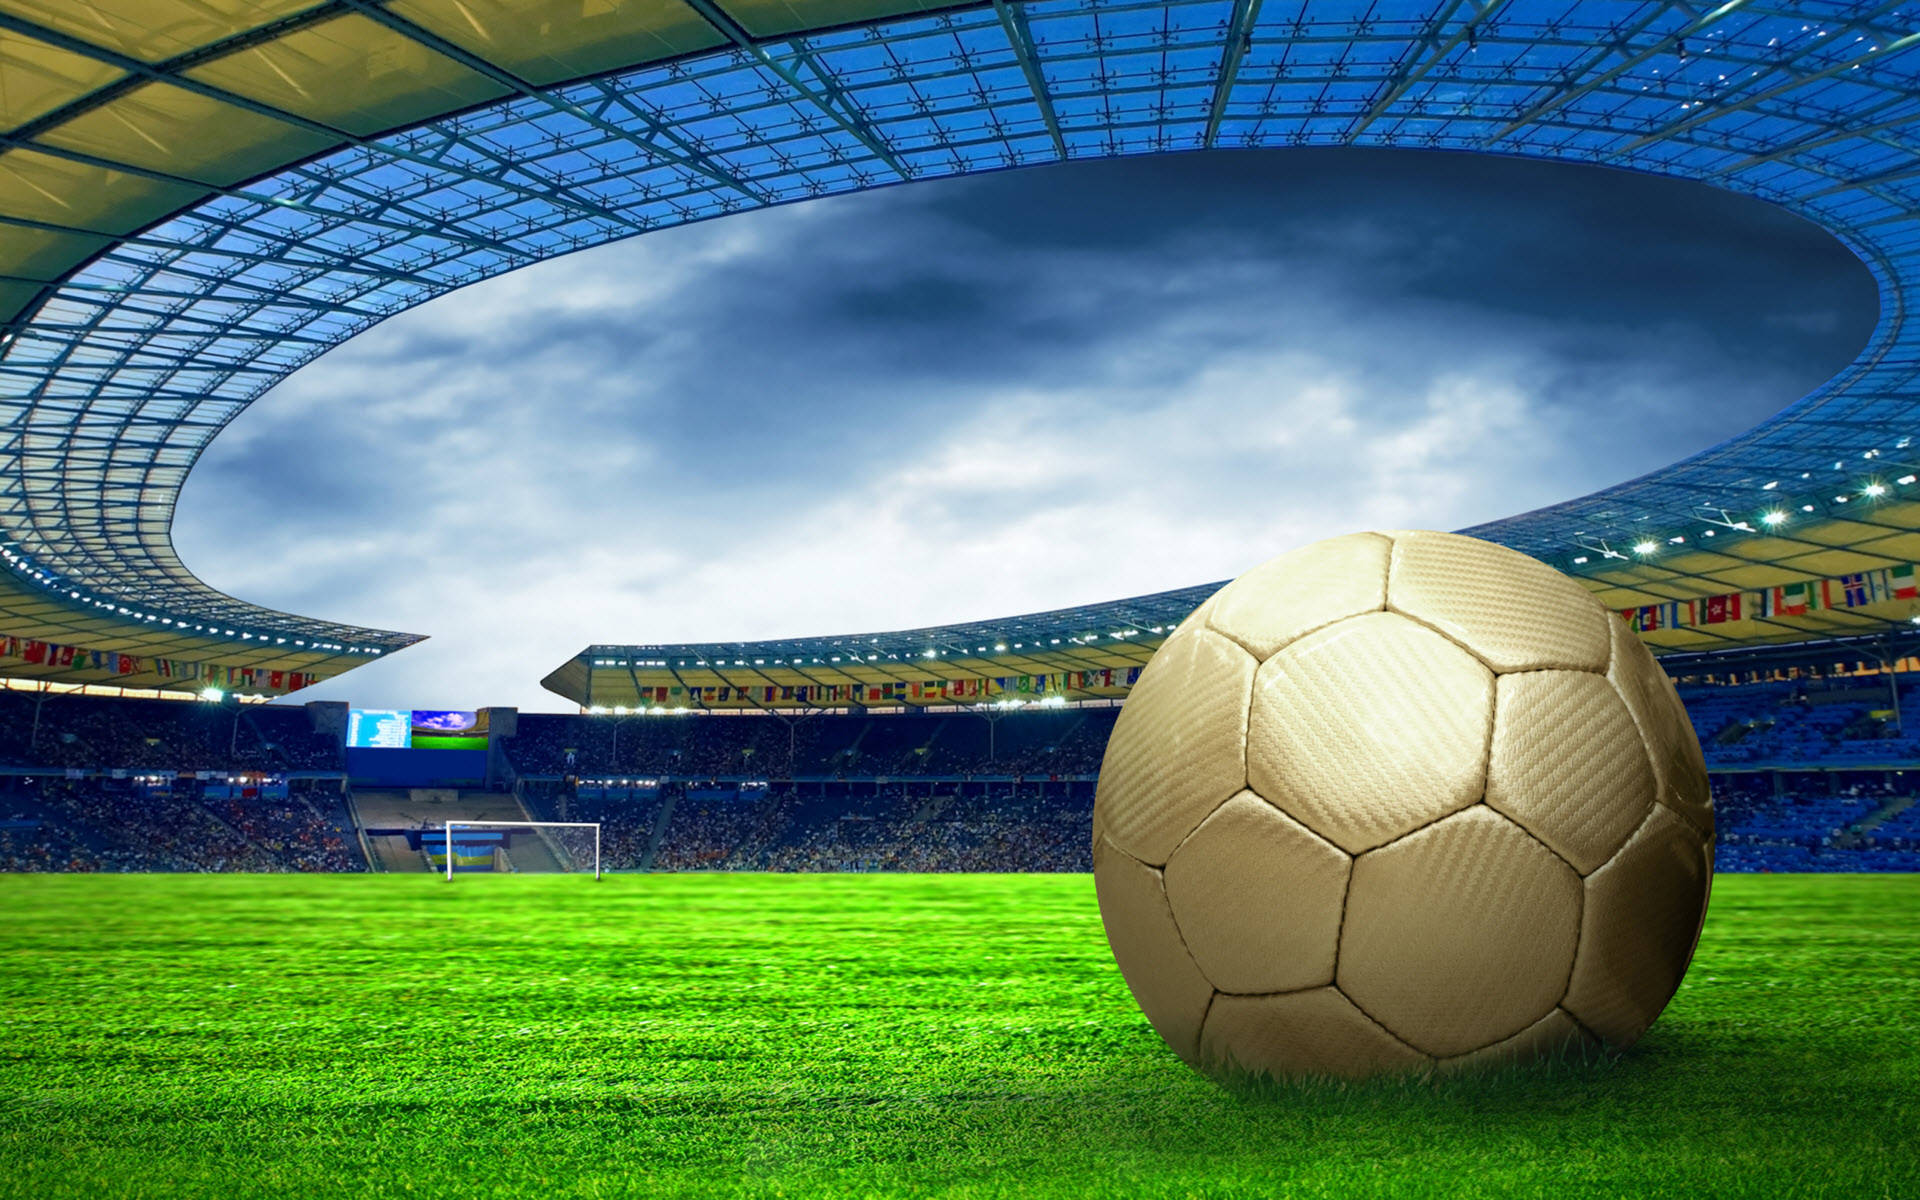

### The goal of this exciting project is to unlock the thrilling world of football by crafting predictions that will keep fans on the edge of their seats!

### Import Relevant Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
train_df= pd.read_csv('results.csv')

### Dataset Description

In [3]:
# date - date of the match
# home_team - the name of the home team
# away_team - the name of the away team
# home_score - full-time home team score including extra time, not including penalty-shootouts
# away_score - full-time away team score including extra time, not including penalty-shootouts
# tournament - the name of the tournament
# city - the name of the city/town/administrative unit where the match was played
# country - the name of the country where the match was played
# neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

### Basic Understanding of Data

In [4]:
train_df.shape 

(45315, 9)

In [5]:
train_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
train_df['result'] = train_df.apply(lambda row: 'Win' if row['home_score'] > row['away_score'] else ('Lose' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)

In [7]:
train_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


In [8]:
train_df.describe()

,home_score,away_score
count,45315.000000,45315.000000
mean,1.739314,1.178241
std,1.746904,1.392095
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [9]:
train_df.describe(include='object')

,date,home_team,away_team,tournament,city,country,result
count,45315,45315,45315,45315,45315,45315,45315
unique,15649,313,308,147,2048,268,3
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States,Win
freq,66,600,565,17773,678,1337,22060


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        45315 non-null  object
 1   home_team   45315 non-null  object
 2   away_team   45315 non-null  object
 3   home_score  45315 non-null  int64 
 4   away_score  45315 non-null  int64 
 5   tournament  45315 non-null  object
 6   city        45315 non-null  object
 7   country     45315 non-null  object
 8   neutral     45315 non-null  bool  
 9   result      45315 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 3.2+ MB


### Exploratory Data Analysis (EDA) and Feature Engineering

In [11]:
data = train_df.copy()

In [12]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


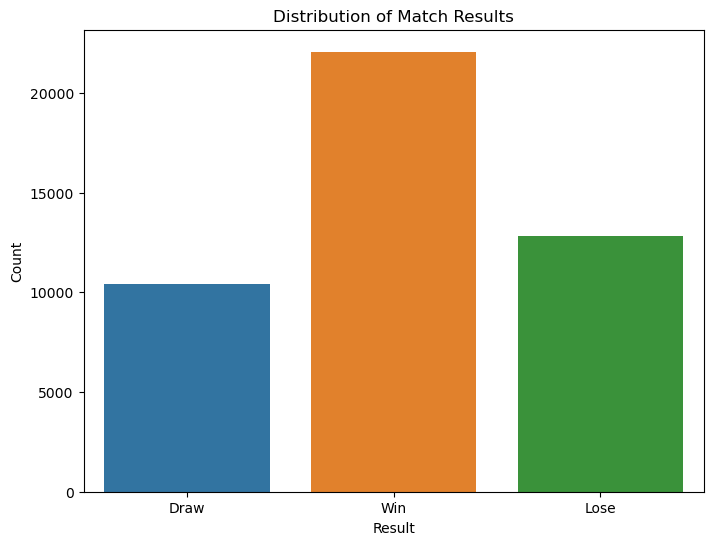

In [13]:
# Visualize the distribution of the target variable 'result'
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=data)
plt.title('Distribution of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

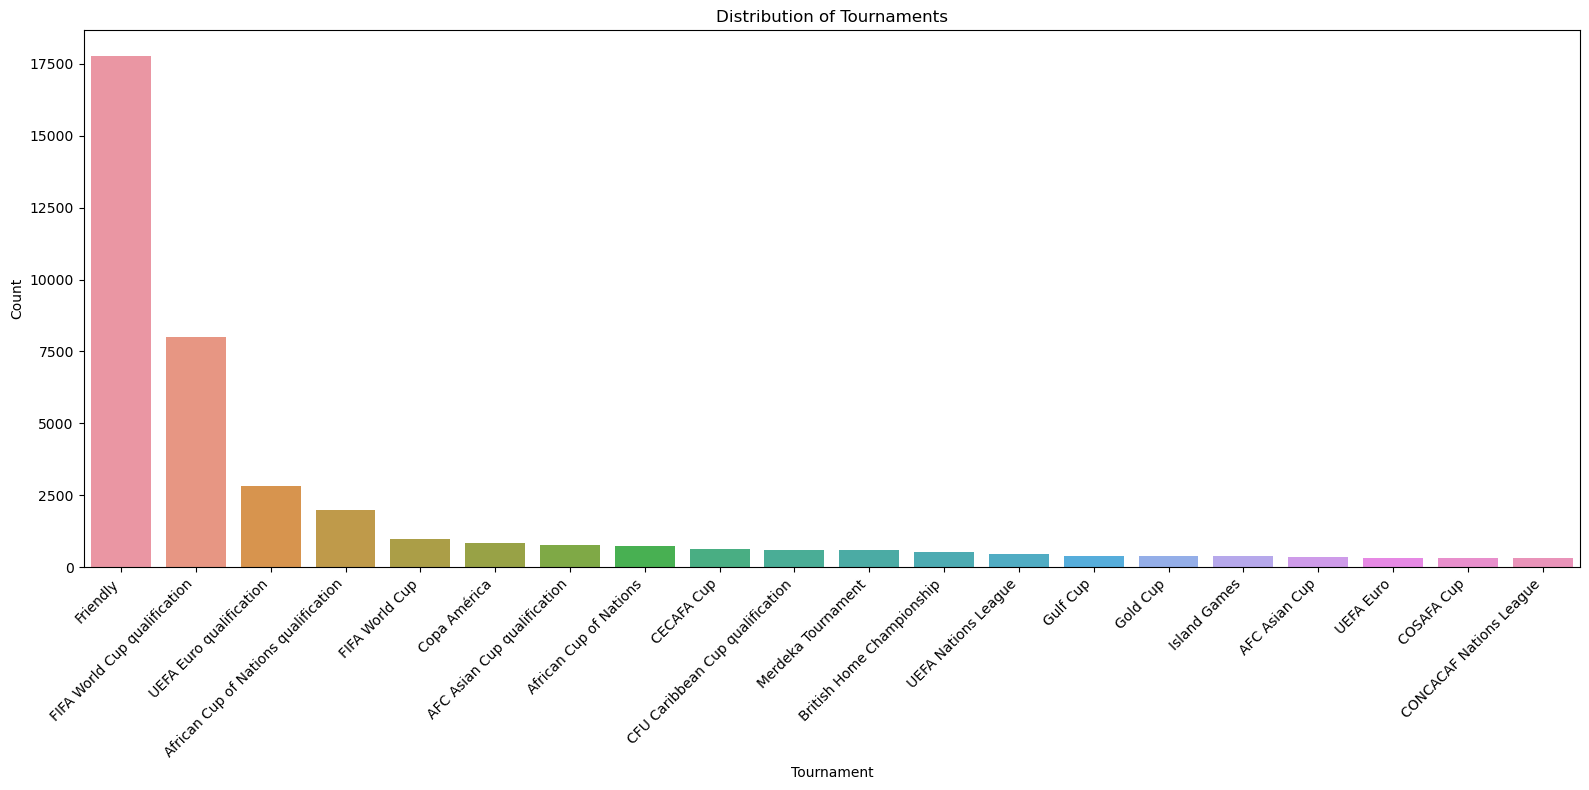

In [14]:
# Visualize the distribution of 'tournament' with limited values
plt.figure(figsize=(16, 8))
sns.countplot(x='tournament', data=data, order=data['tournament'].value_counts().index[:20])  # Displaying top 20 tournaments
plt.title('Distribution of Tournaments')
plt.xlabel('Tournament')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotating and adjusting font size
plt.tight_layout()  # Ensures labels are not cut off
plt.show() 

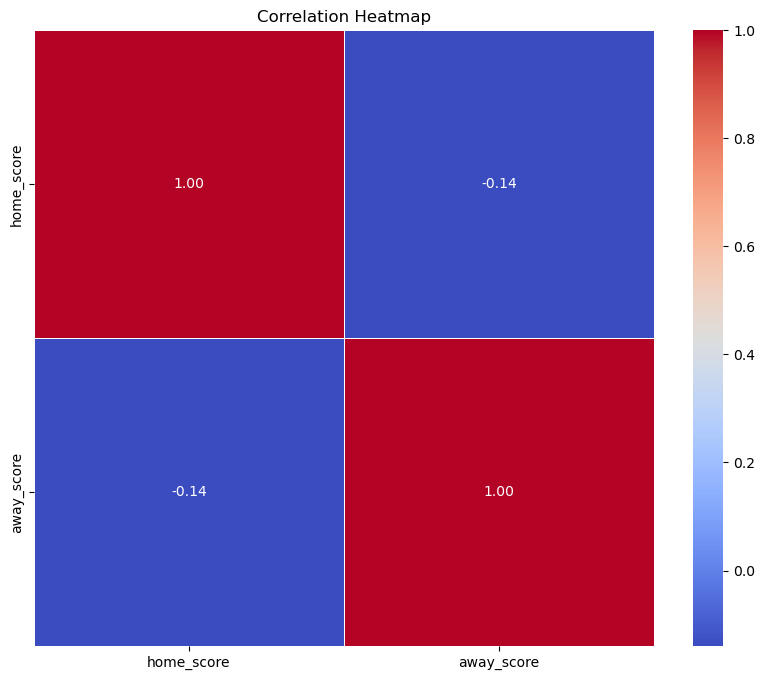

In [15]:
# Visualize the correlation between numerical features
# Exclude non-numeric columns before creating the correlation matrix
numerical_columns = ['home_score', 'away_score']

# Visualize the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

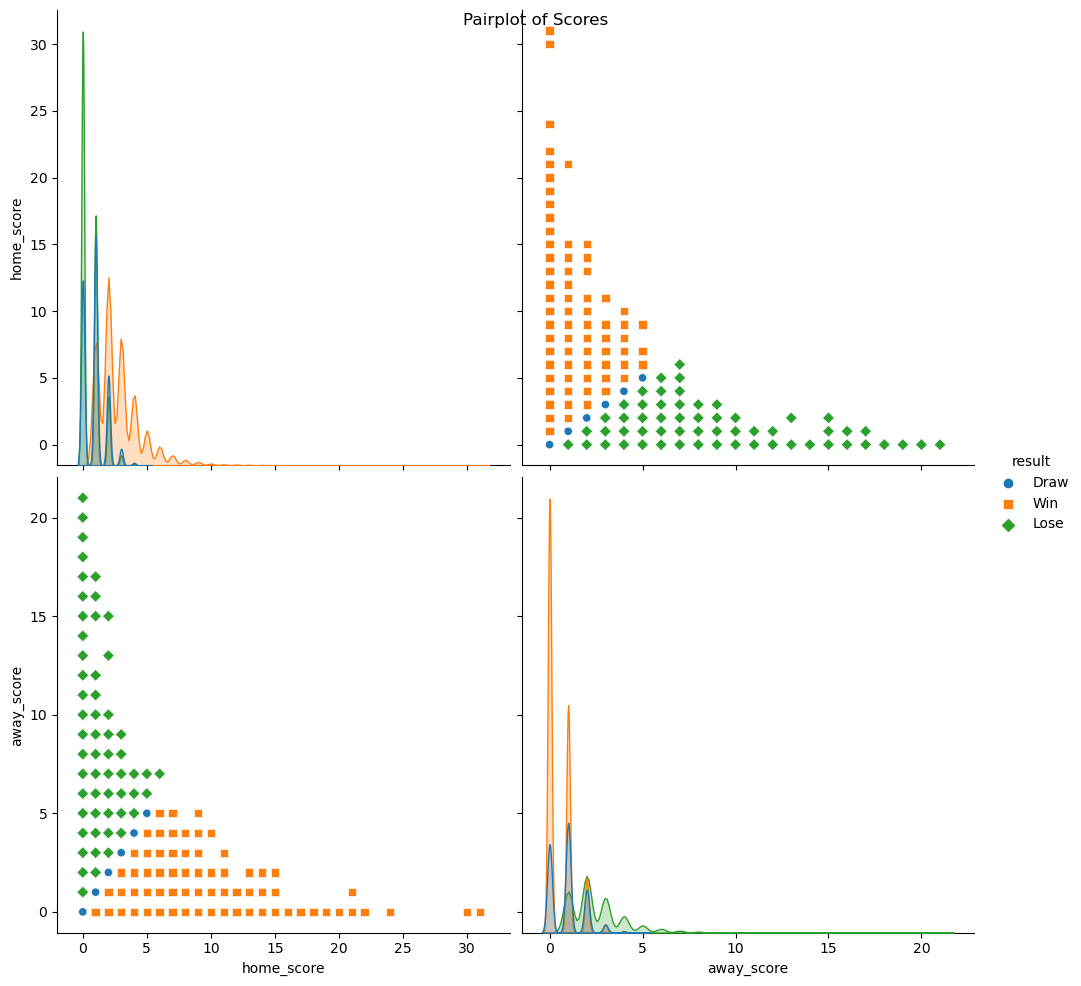

In [16]:
# Pairplot for selected columns
sns.pairplot(data[['home_score', 'away_score', 'result']], hue='result', markers=['o', 's', 'D'], height=5)
plt.suptitle('Pairplot of Scores')
plt.show()

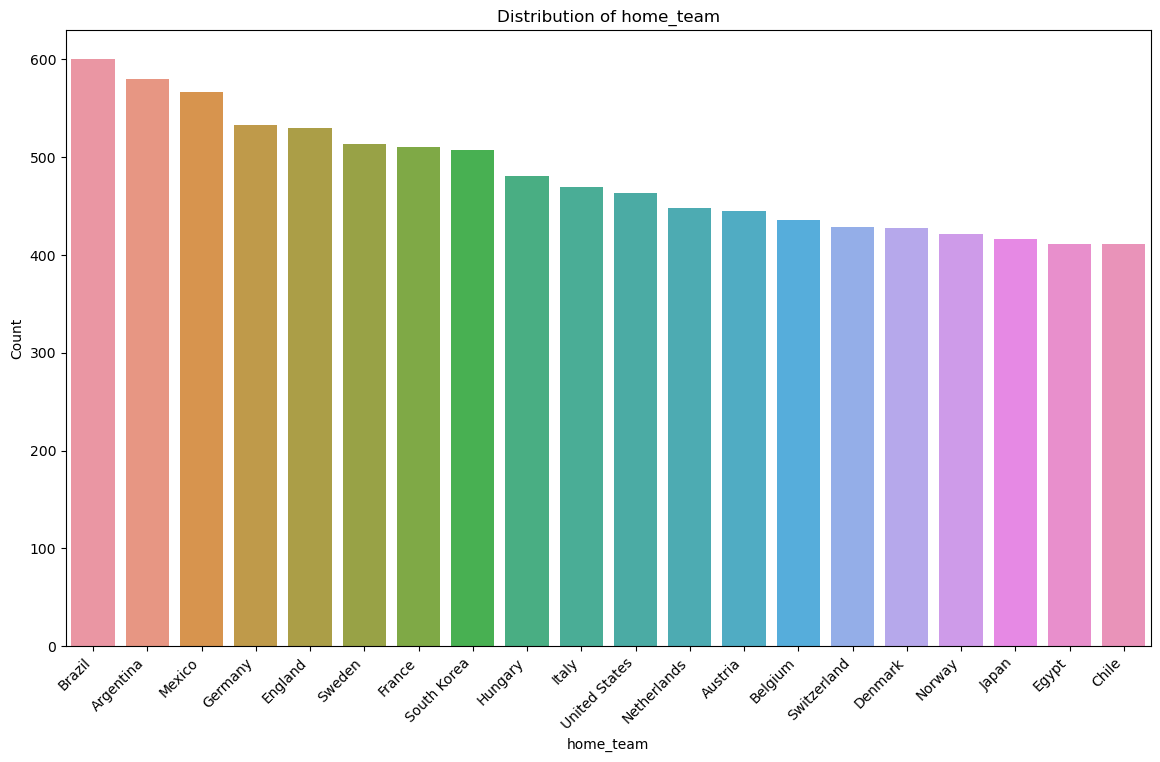

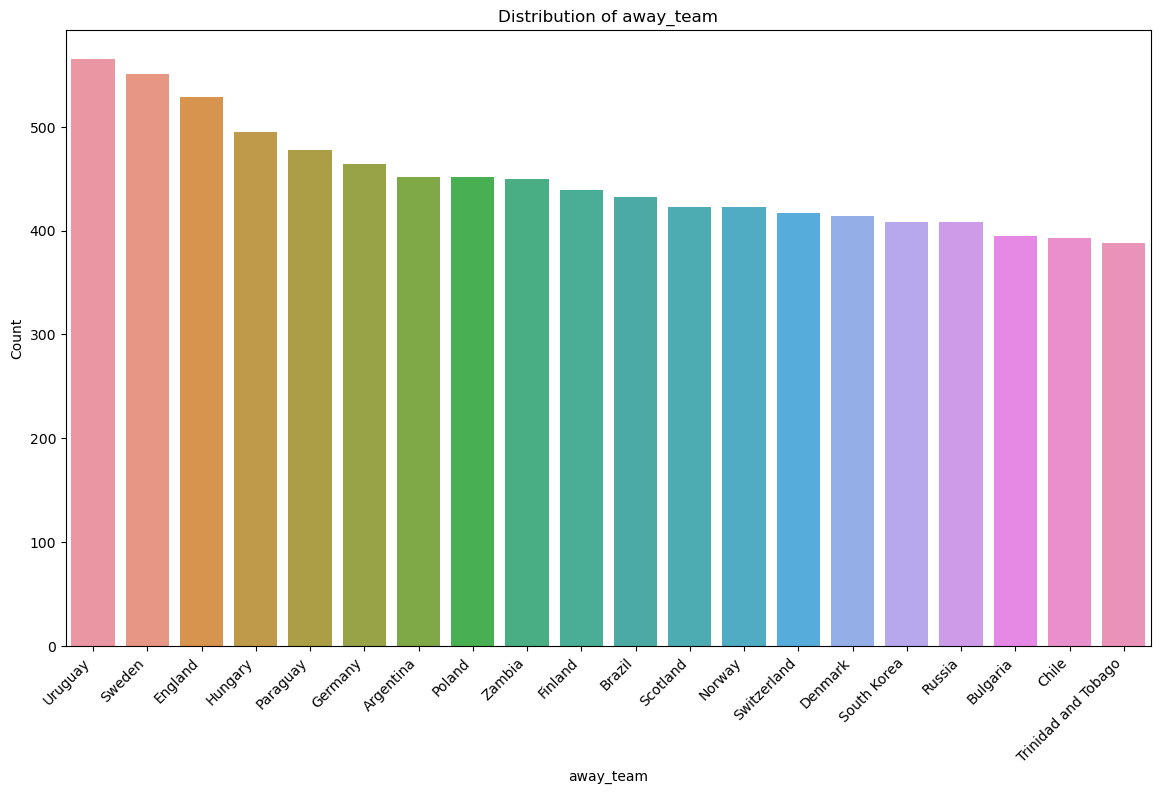

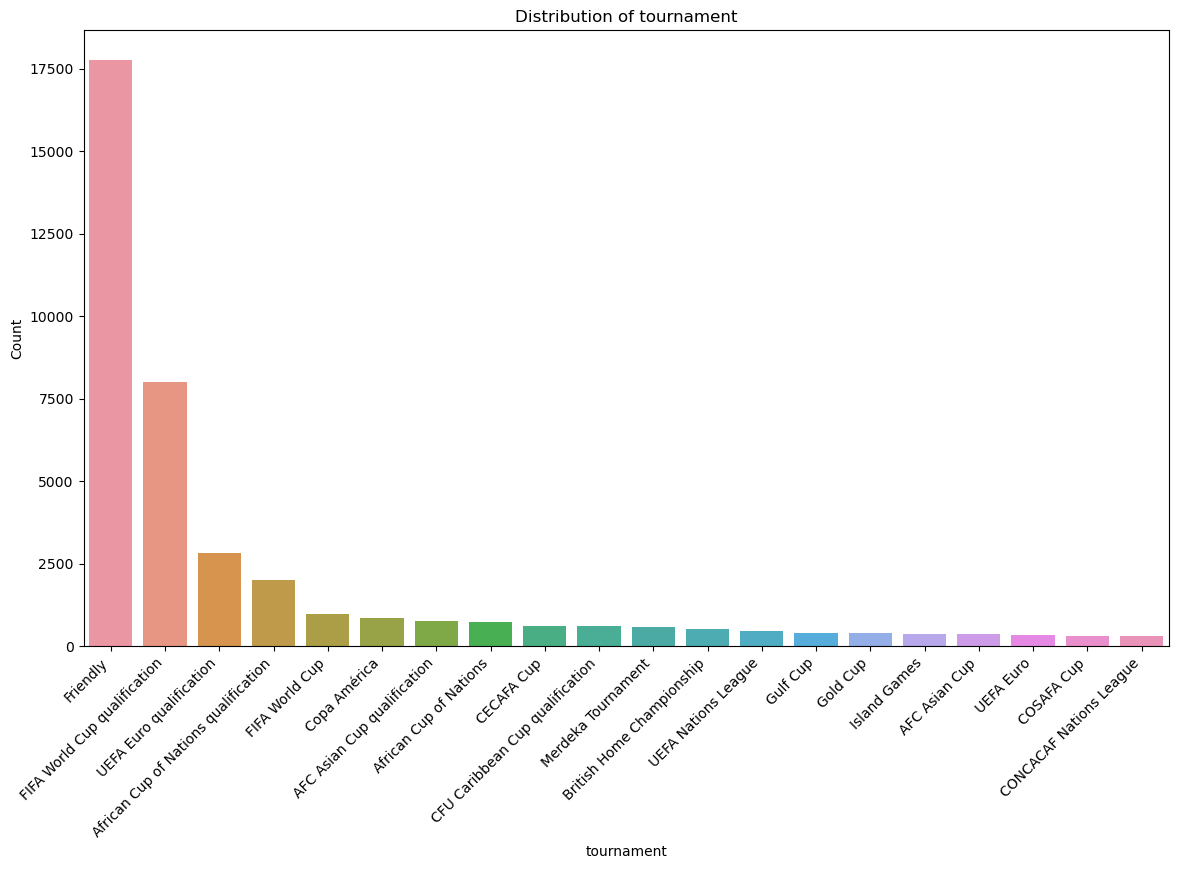

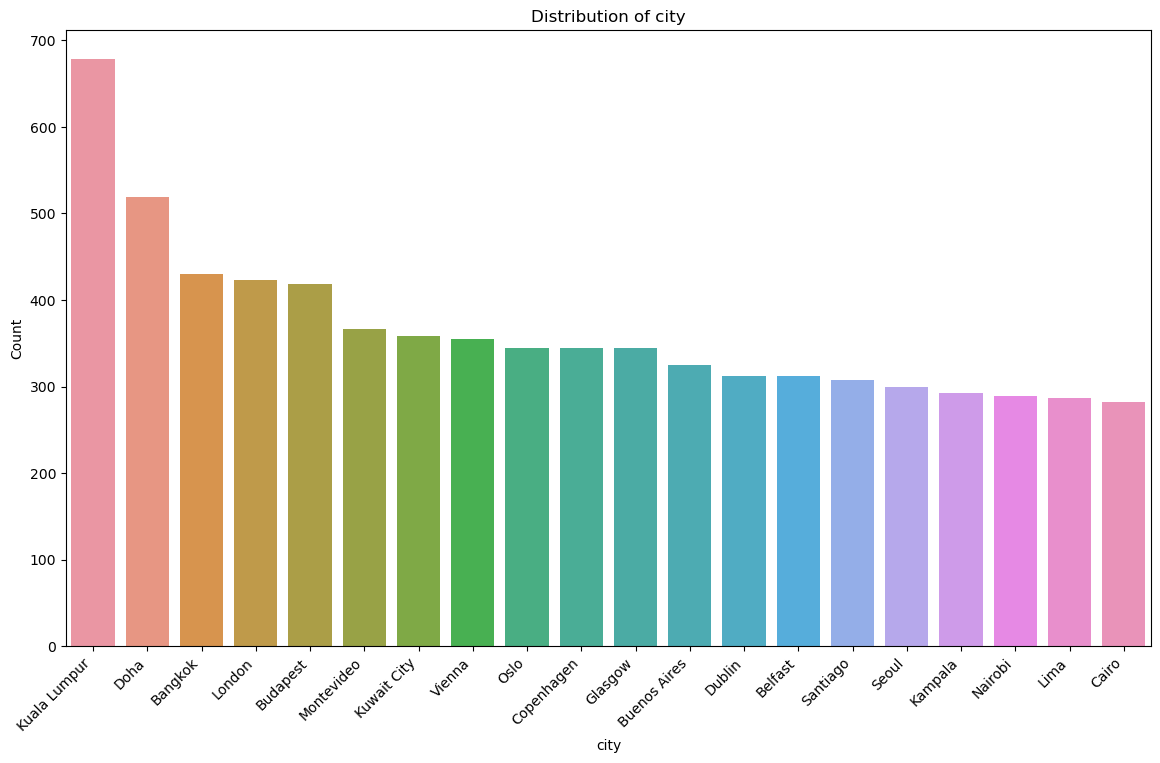

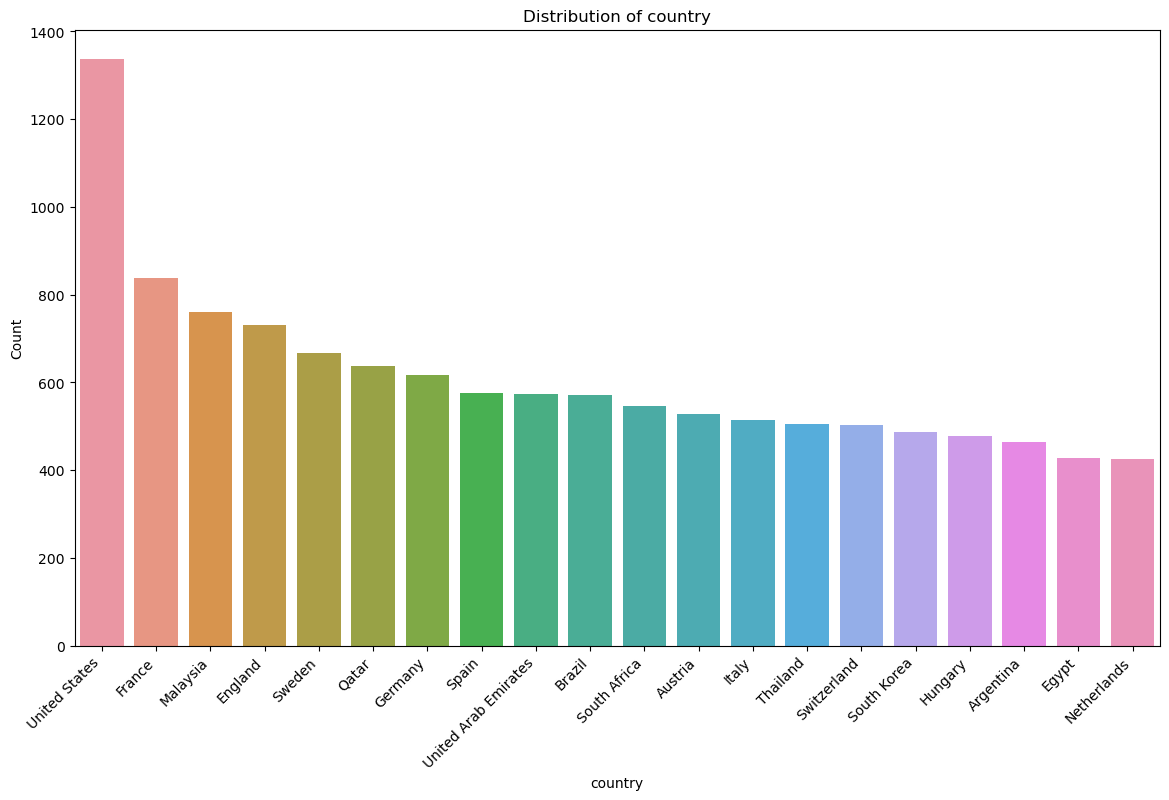

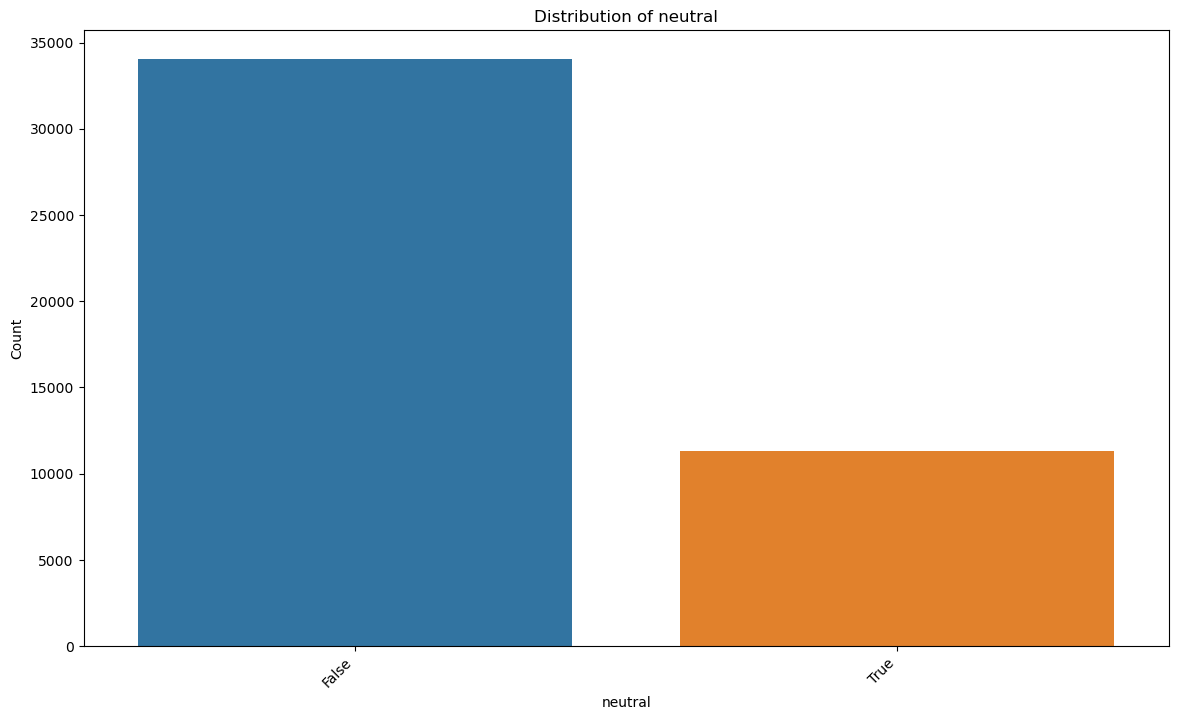

In [17]:
# Visualize the distribution of each categorical column
categorical_columns = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral']
for column in categorical_columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index[:20])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

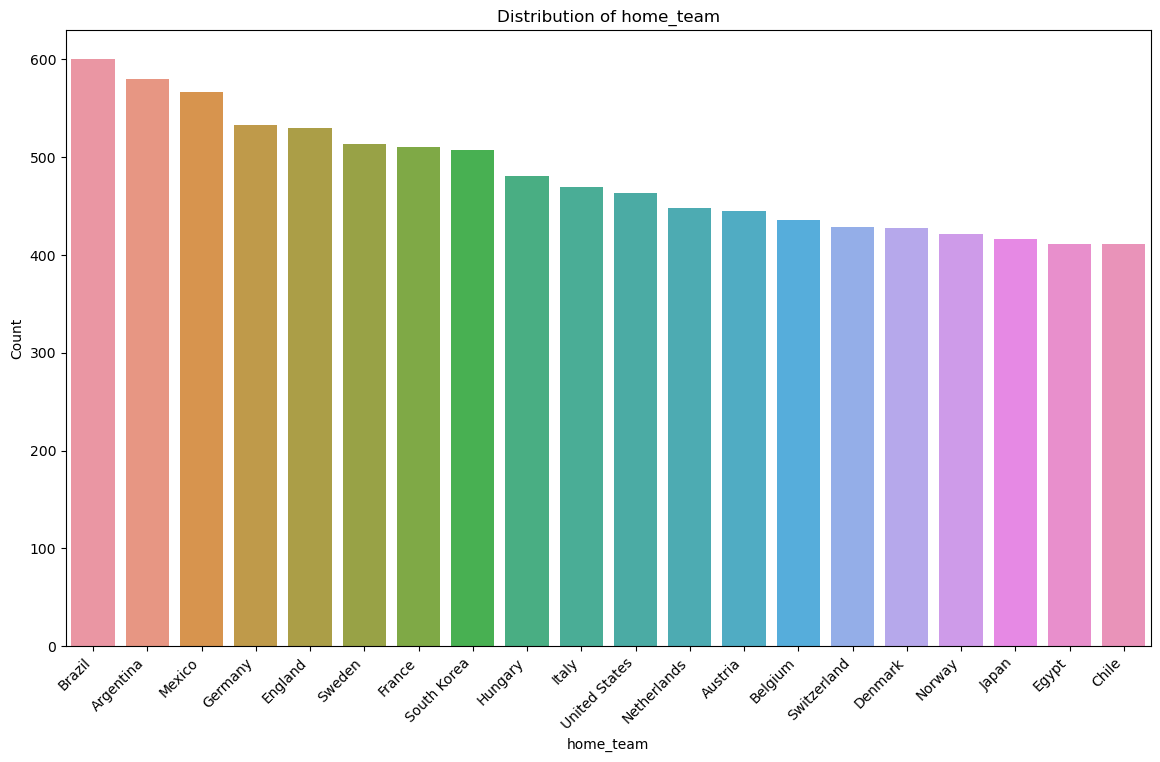

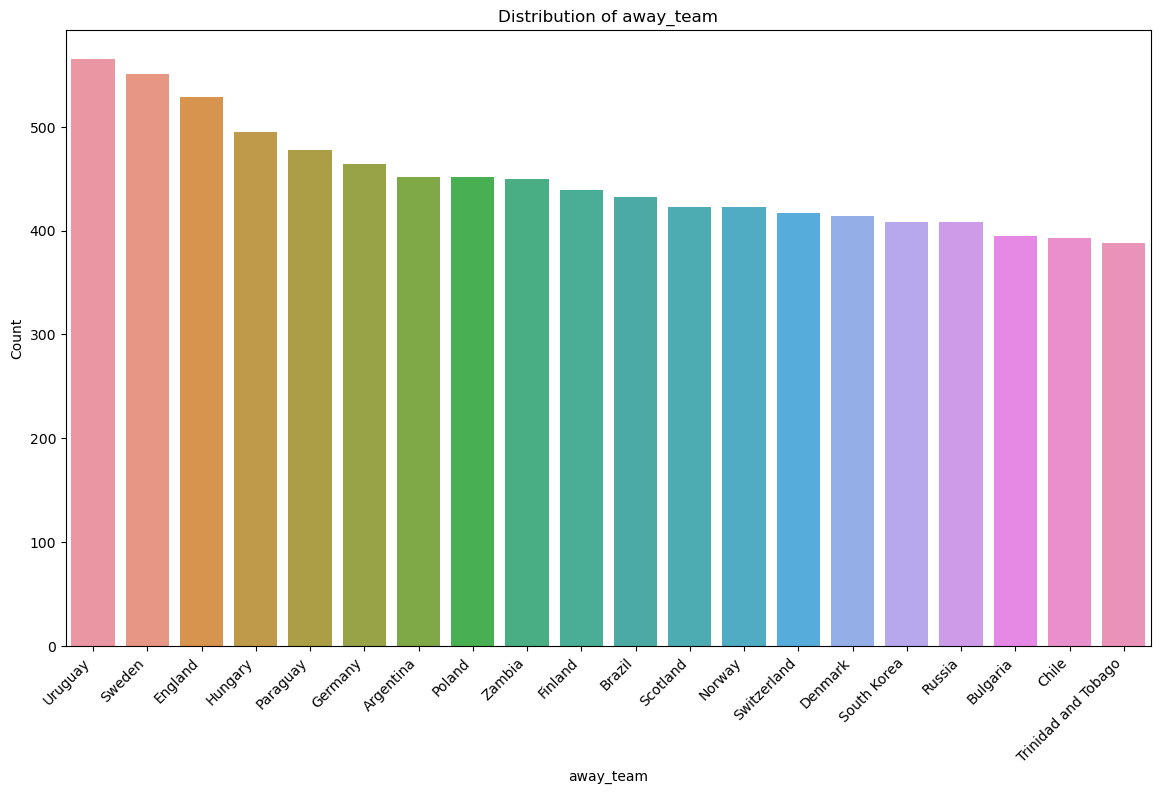

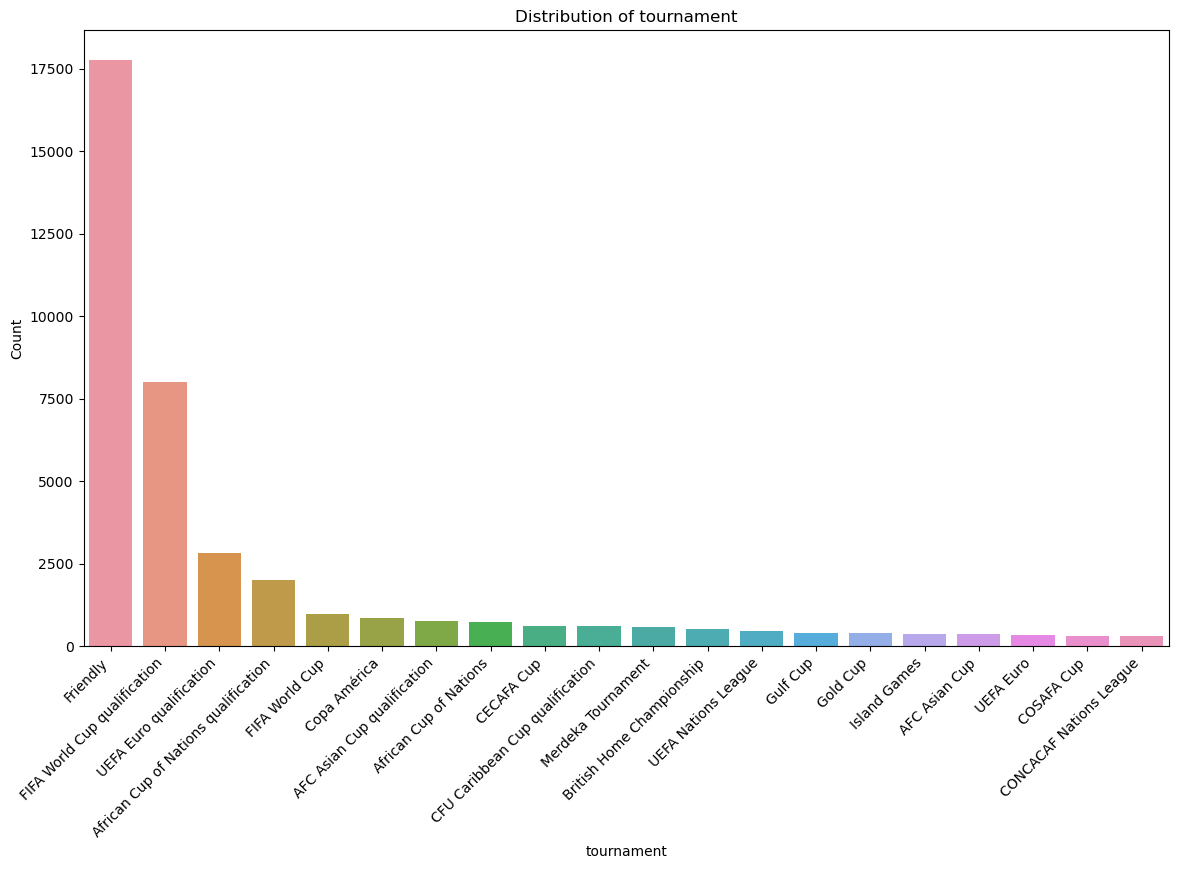

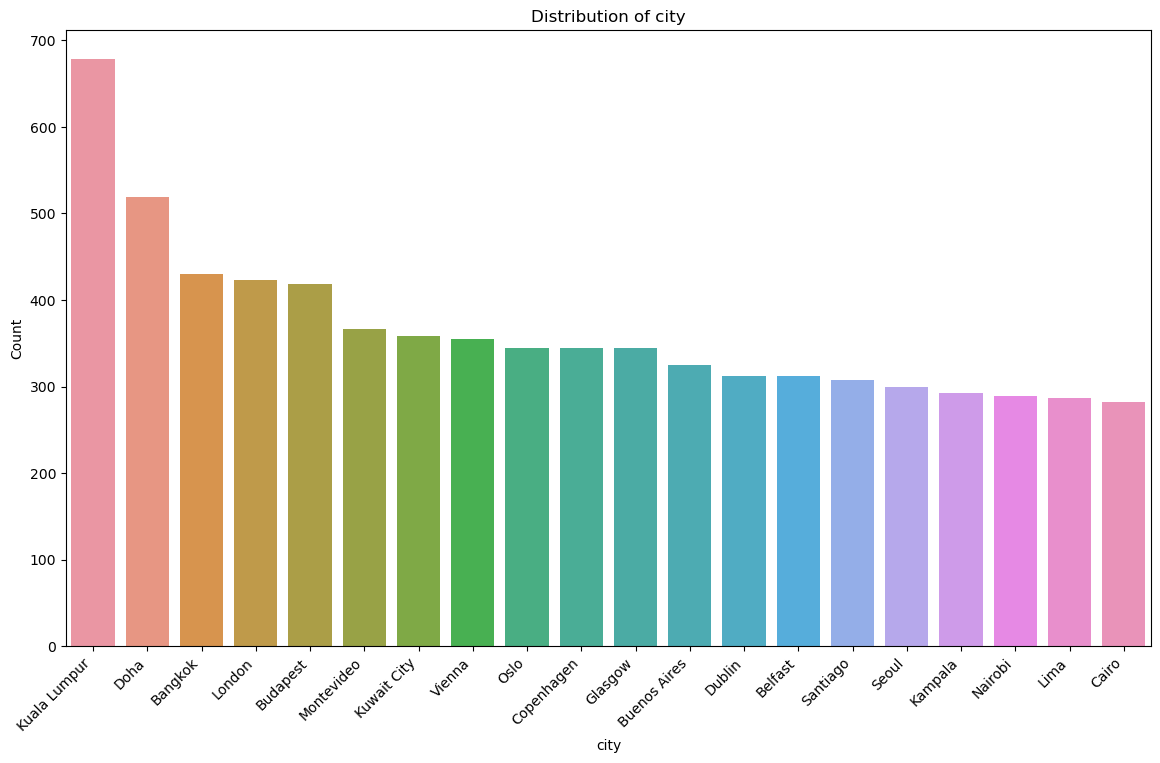

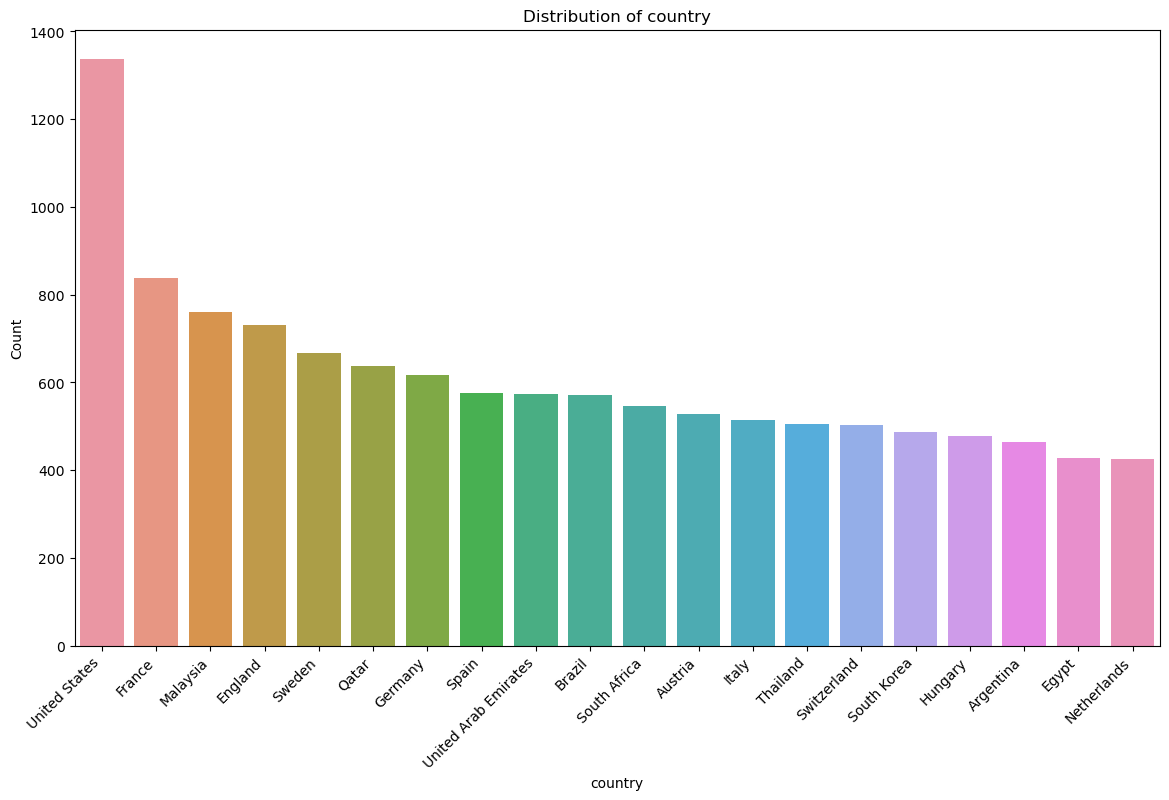

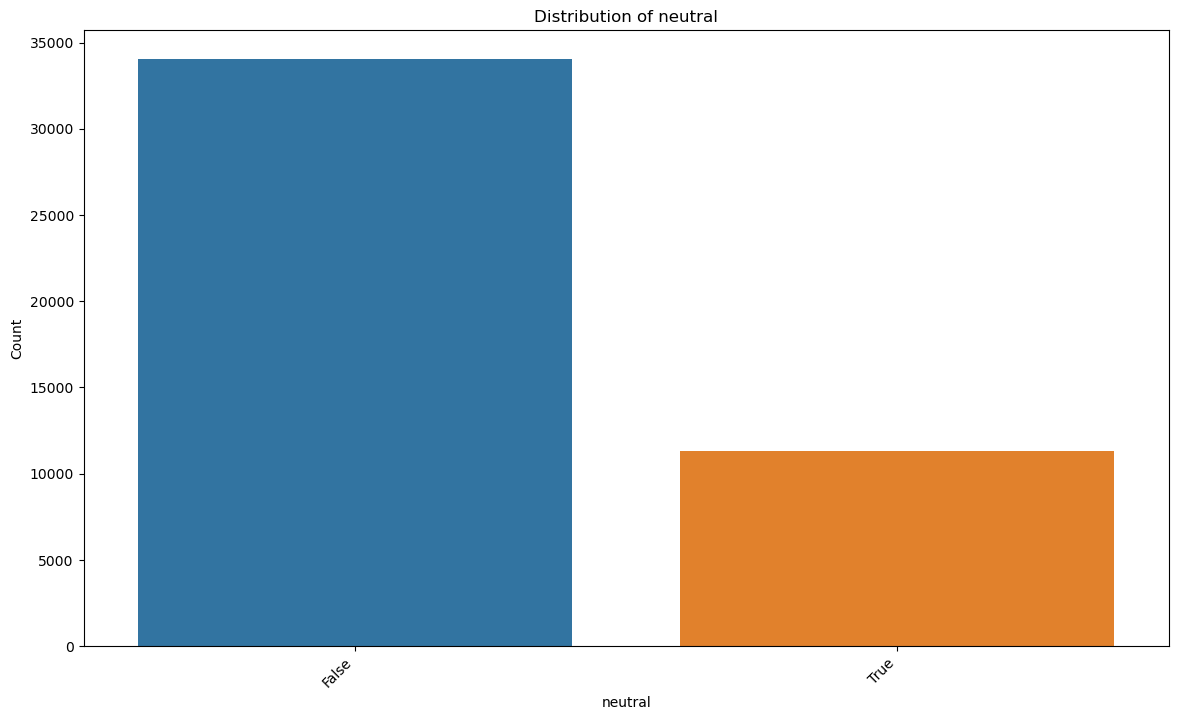

In [18]:
categorical_columns = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral']

for column in categorical_columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index[:20])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

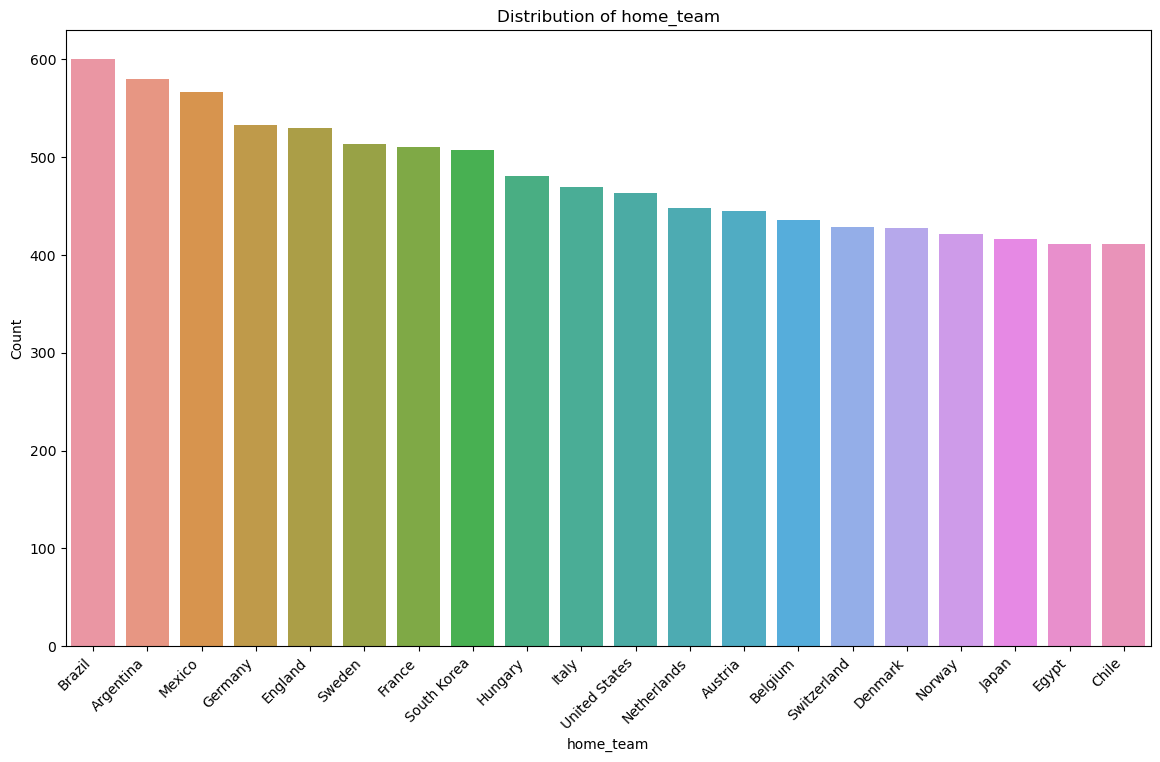

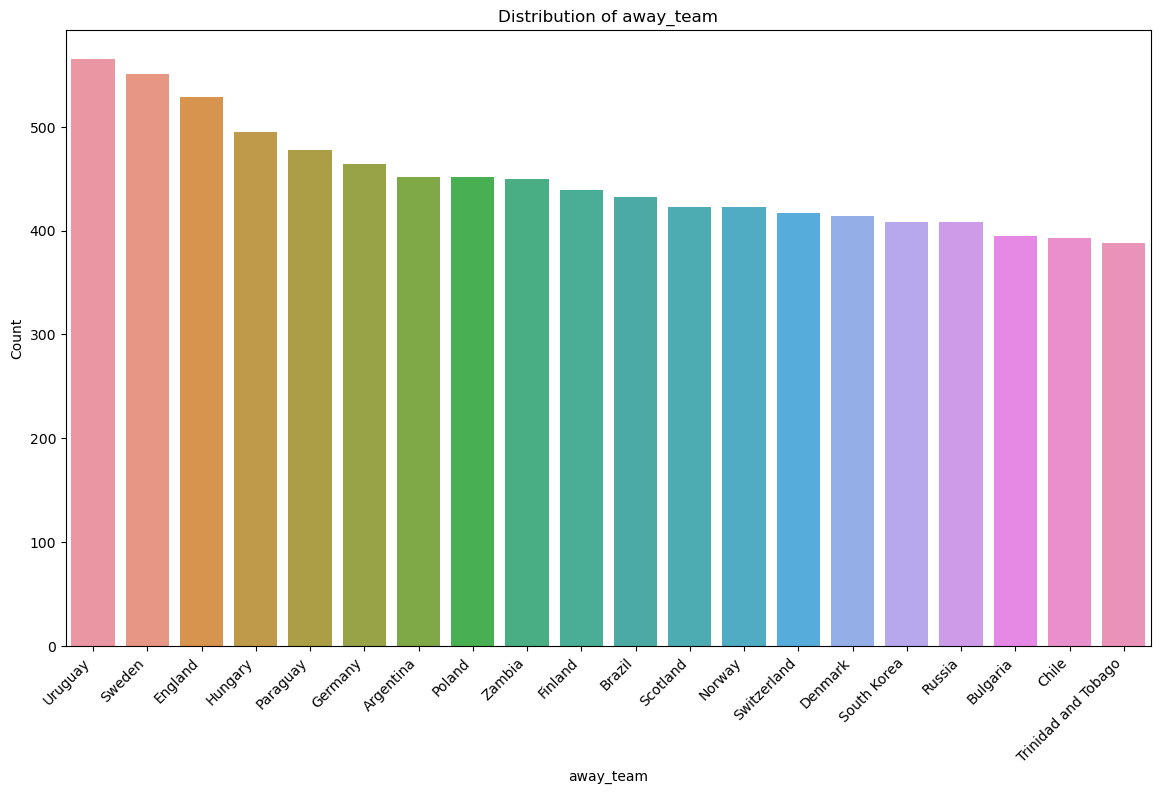

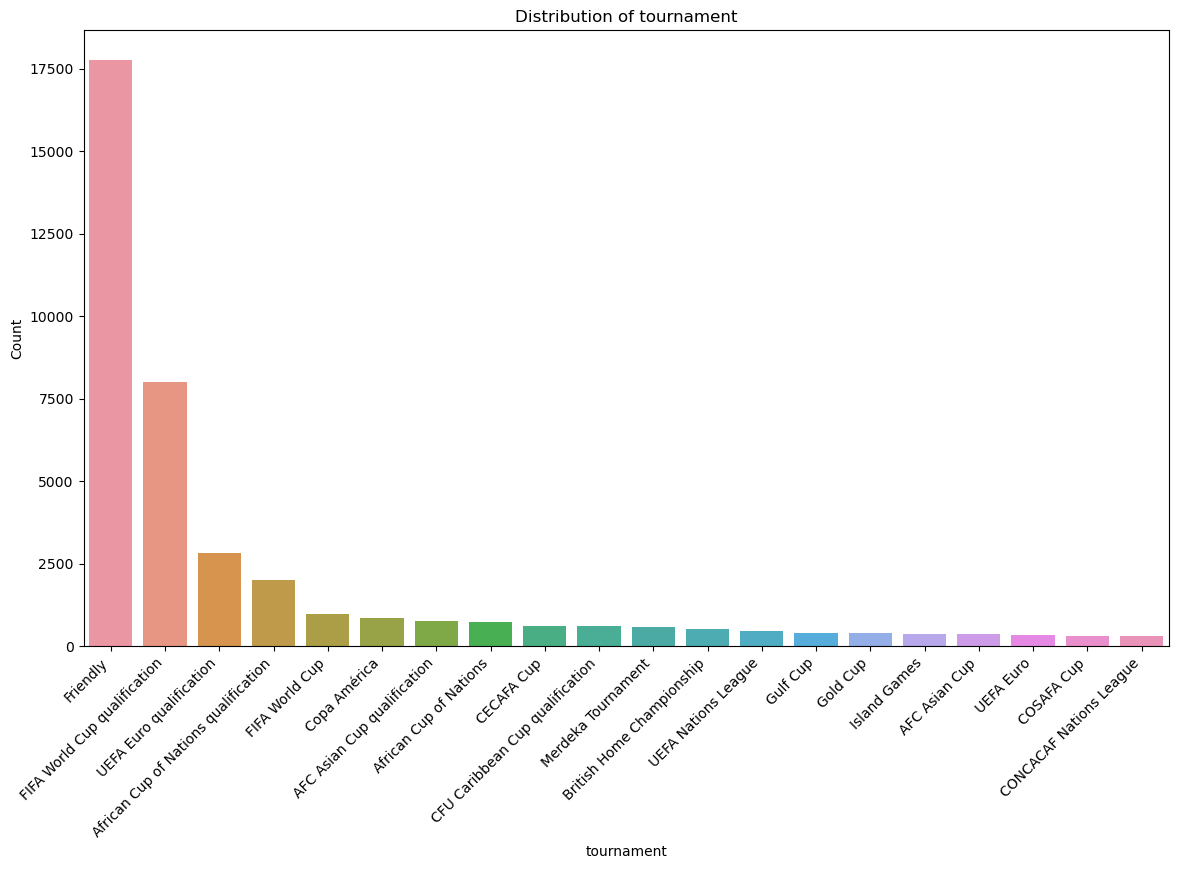

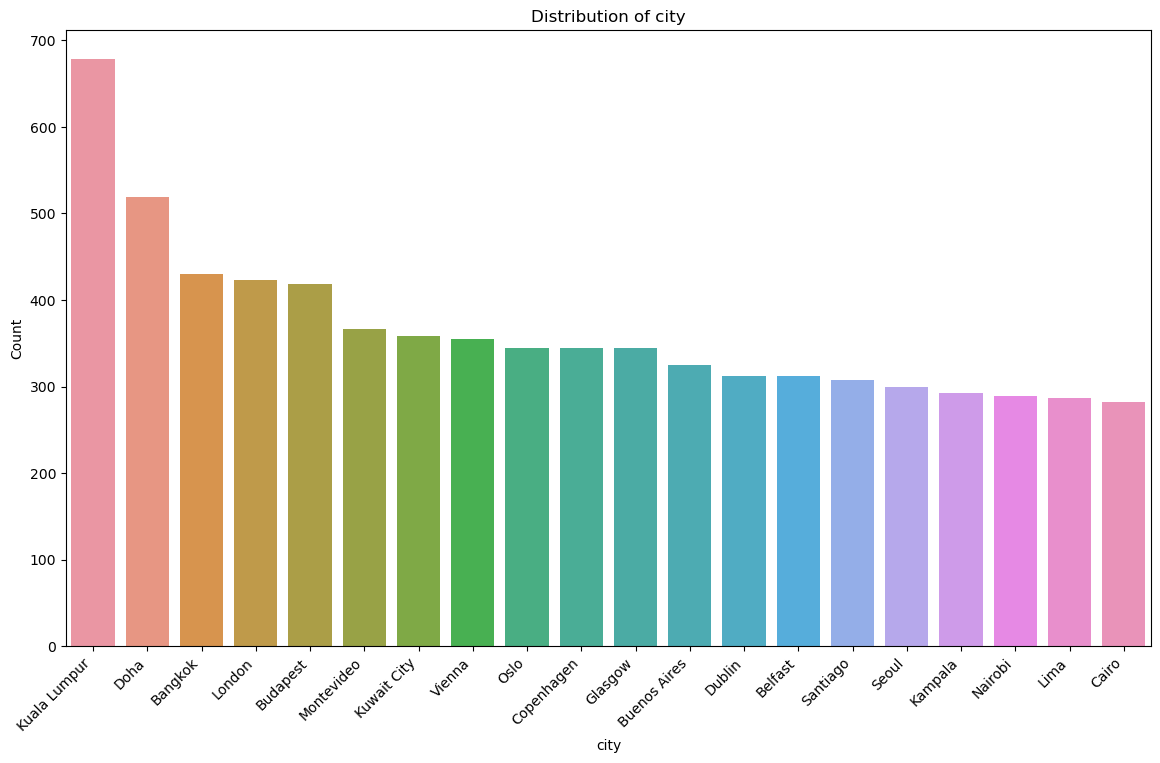

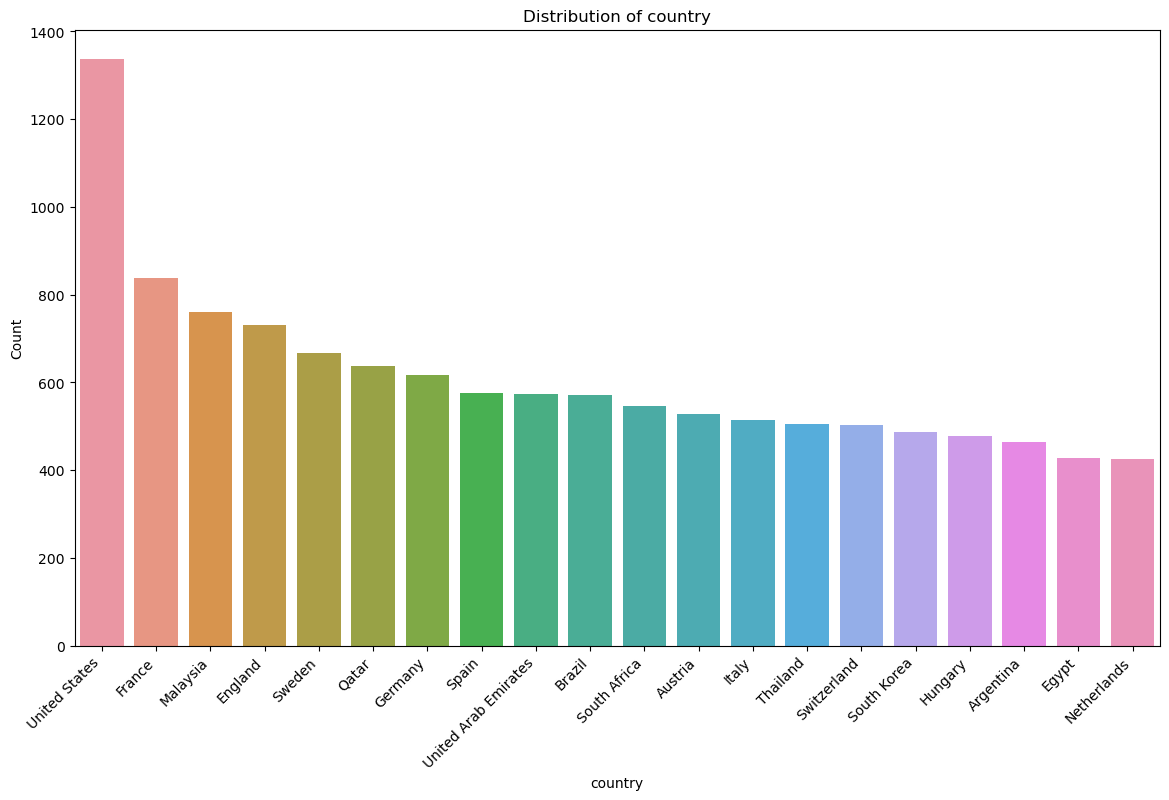

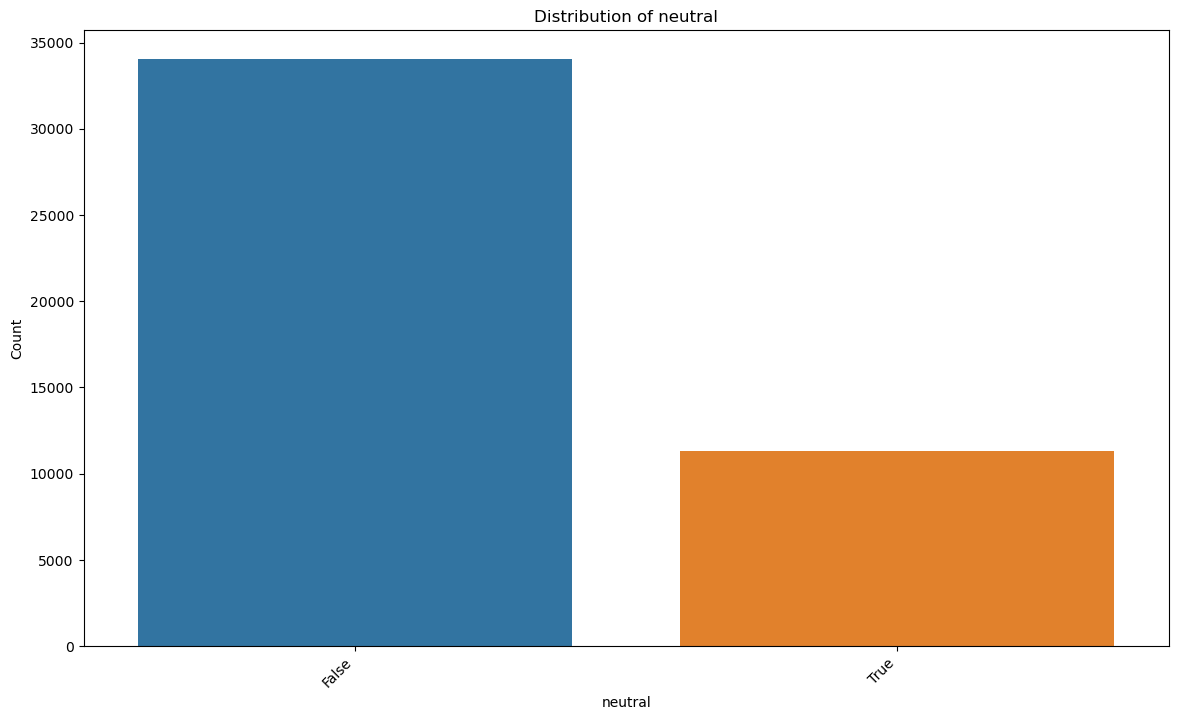

In [19]:

categorical_columns = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral']

for column in categorical_columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index[:20])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

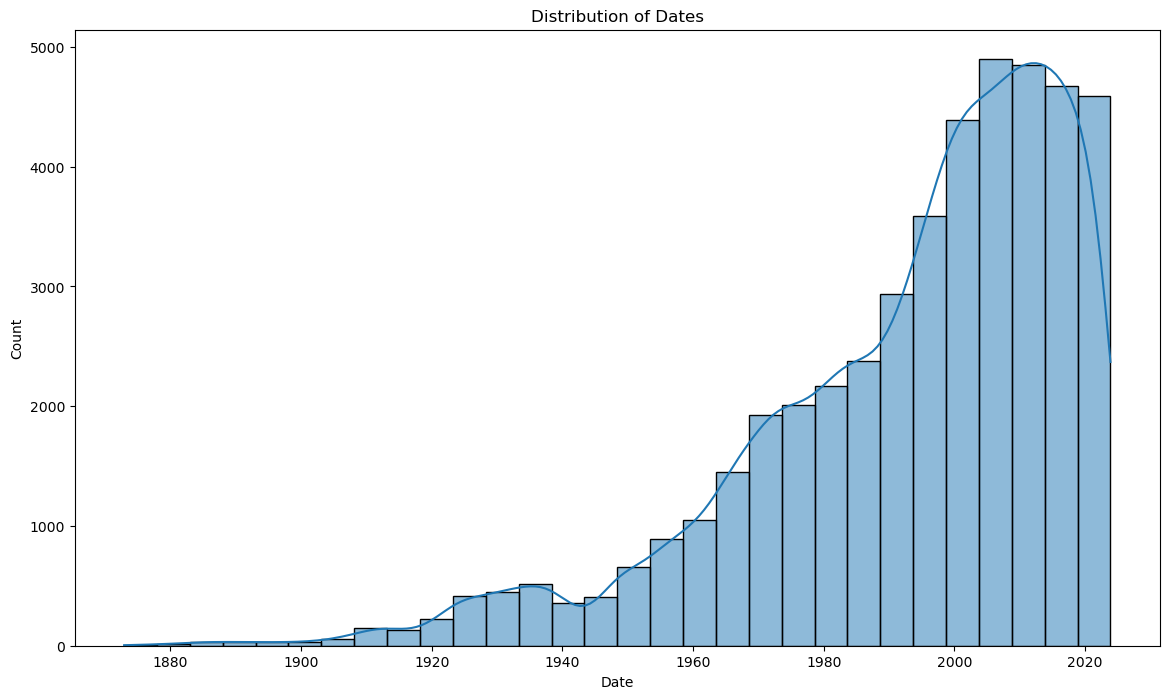

In [20]:
# Visualize the distribution of date (assuming it's datetime)
plt.figure(figsize=(14, 8))
data['date'] = pd.to_datetime(data['date'])
sns.histplot(data['date'], bins=30, kde=True)
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

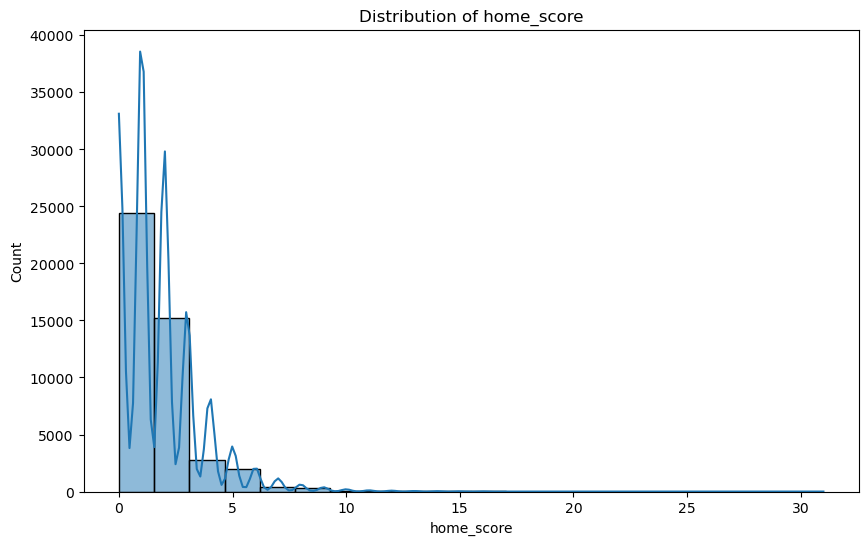

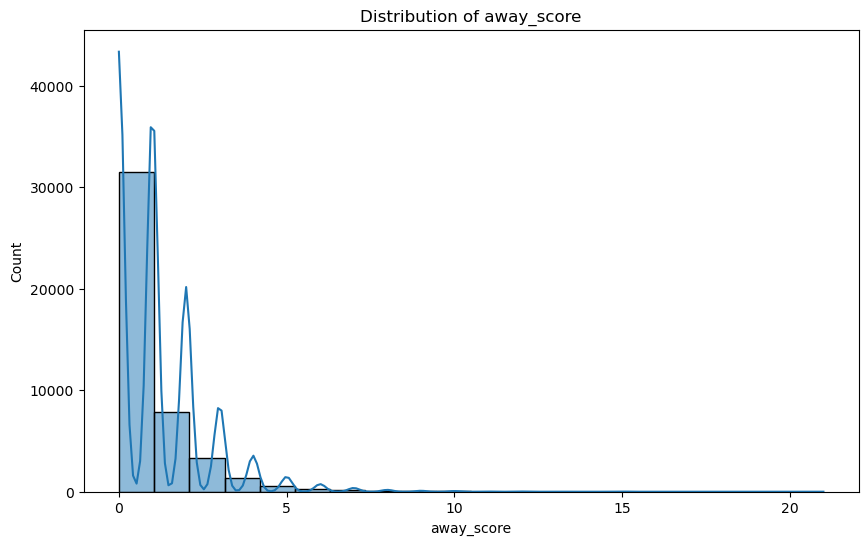

In [21]:
# Visualize the distribution of numerical columns
numerical_columns = ['home_score', 'away_score']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [22]:
# Feature engineering: Extract year, month, and day from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [23]:
data.drop(['date'], axis=1, inplace=True)

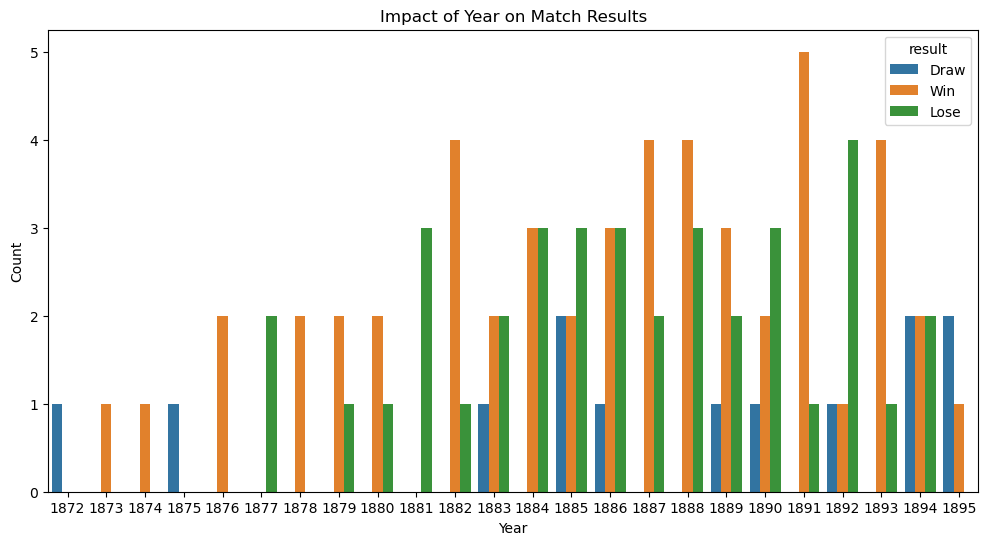

In [24]:
# Visualize the impact of the 'year' feature on match results
subdata = data.head(100)
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='result', data=subdata)
plt.title('Impact of Year on Match Results')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

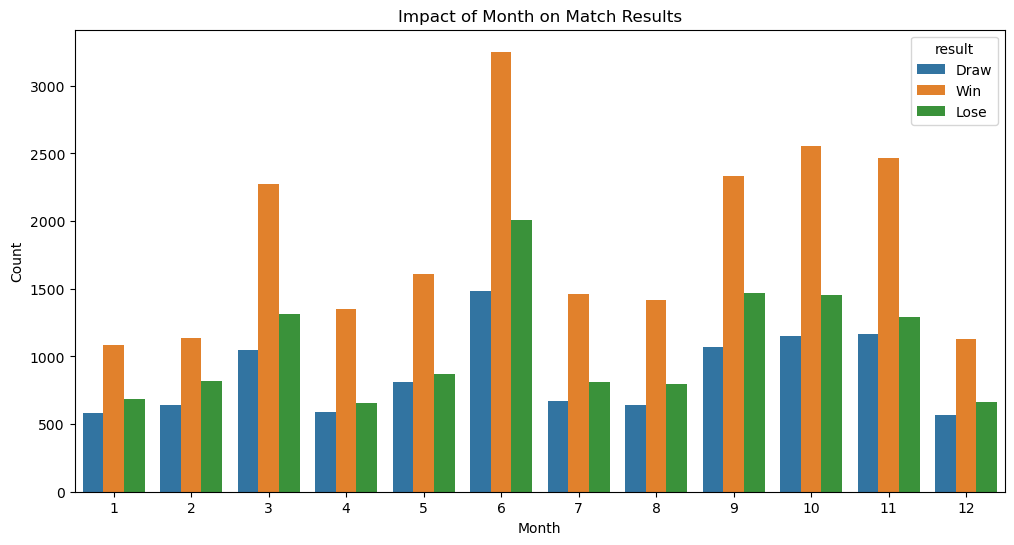

In [25]:
# Visualize the impact of the 'month' feature on match results
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='result', data=data)
plt.title('Impact of Month on Match Results')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

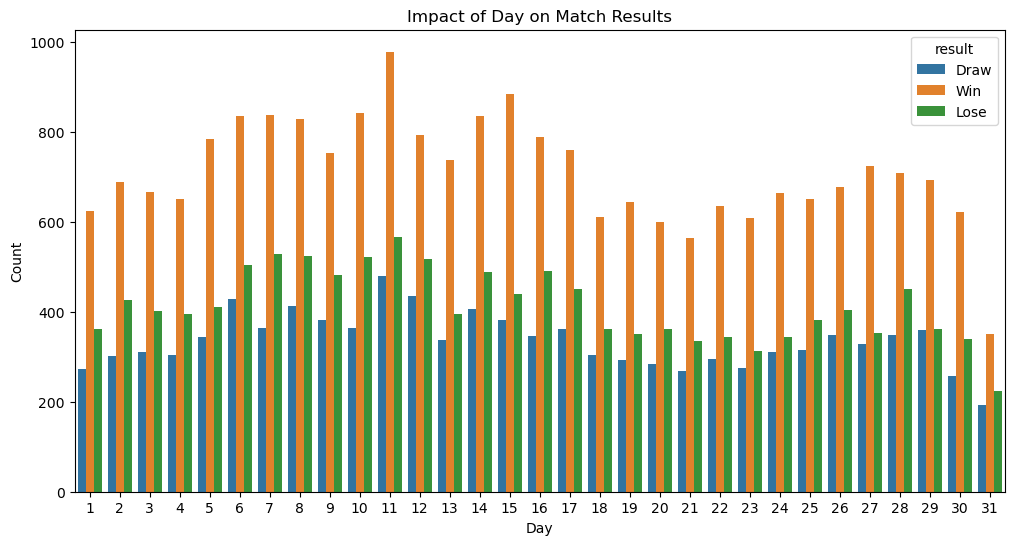

In [26]:
# Visualize the impact of the 'day' feature on match results
plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='result', data=data)
plt.title('Impact of Day on Match Results')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

In [27]:
# Feature engineering: Create a 'season' column based on the month
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data['season'] = data['month'].map(seasons)

In [28]:
# Feature engineering: Calculate the goal difference
data['goal_difference'] = data['home_score'] - data['away_score']

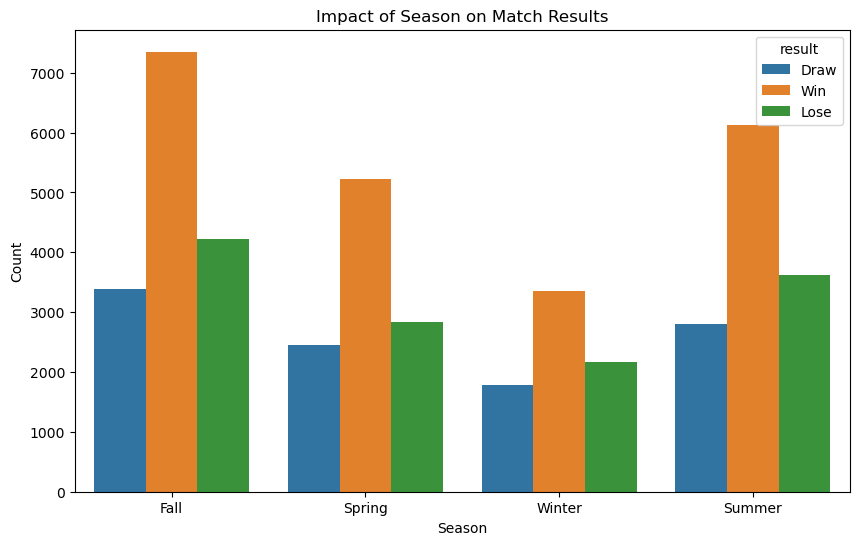

In [29]:
# Visualize the impact of the 'season' feature on match results
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='result', data=data)
plt.title('Impact of Season on Match Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

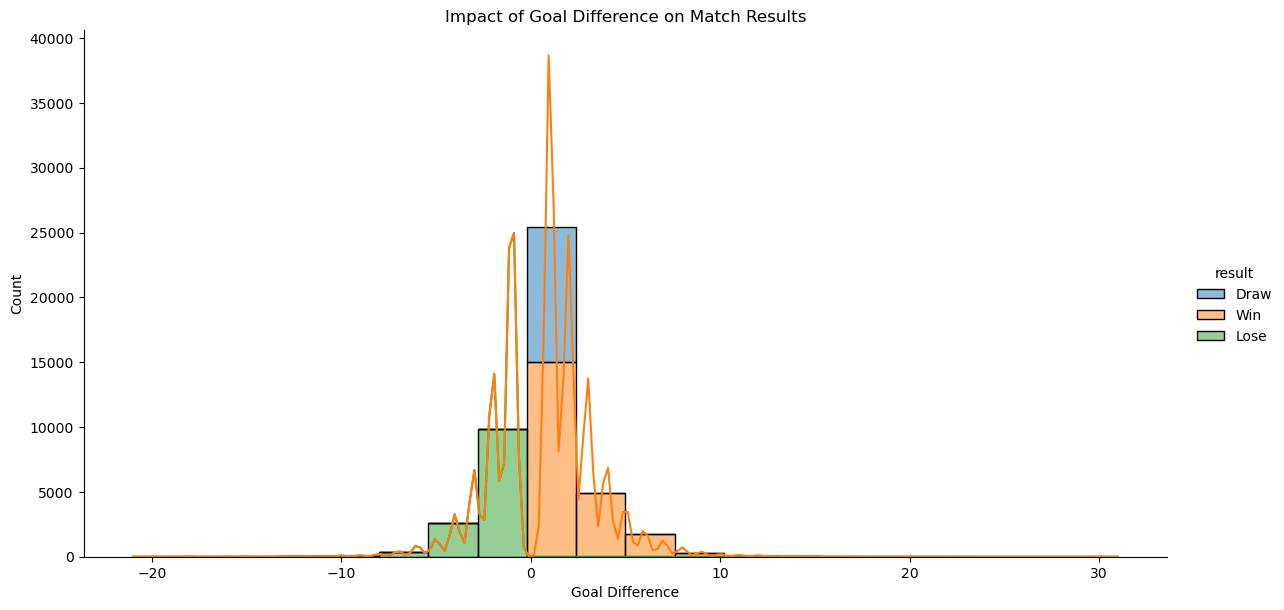

In [30]:
# Visualize the impact of the 'goal_difference' feature on match results
plt.figure(figsize=(12, 6))
sns.displot(data, x='goal_difference', bins=20, kde=True, hue='result', multiple='stack', height=6, aspect=2)
plt.title('Impact of Goal Difference on Match Results')
plt.xlabel('Goal Difference')
plt.ylabel('Count')
plt.show()

### Data Pre-processing or Cleaning

In [31]:
# Checking Duplicates Data

In [32]:
data.duplicated().sum()

0

In [33]:
"""
Observation
💡 We can observe that we don't have any duplicates values in our training datasets.
💡 So we don't have any type of Data Lekage in our DataSet.
"""

"\nObservation\n💡 We can observe that we don't have any duplicates values in our training datasets.\n💡 So we don't have any type of Data Lekage in our DataSet.\n"

In [34]:
# Checking Cardinality of Categorical features

In [35]:
data.select_dtypes(include='object').nunique()

home_team      313
away_team      308
tournament     147
city          2048
country        268
result           3
season           4
dtype: int64

### Lets deal with missing values

In [36]:
data.isnull().sum() 

home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral            0
result             0
year               0
month              0
day                0
season             0
goal_difference    0
dtype: int64

In [37]:
# Checking Total Number & Percentage of Missing Values in Training Dataset

In [38]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns={0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum() > 0] / len(data), 2)

In [39]:
df

,Number of Missing Values,% of Missing Values


In [40]:
# Visualizing Missing Numbers

In [41]:
import missingno as msno

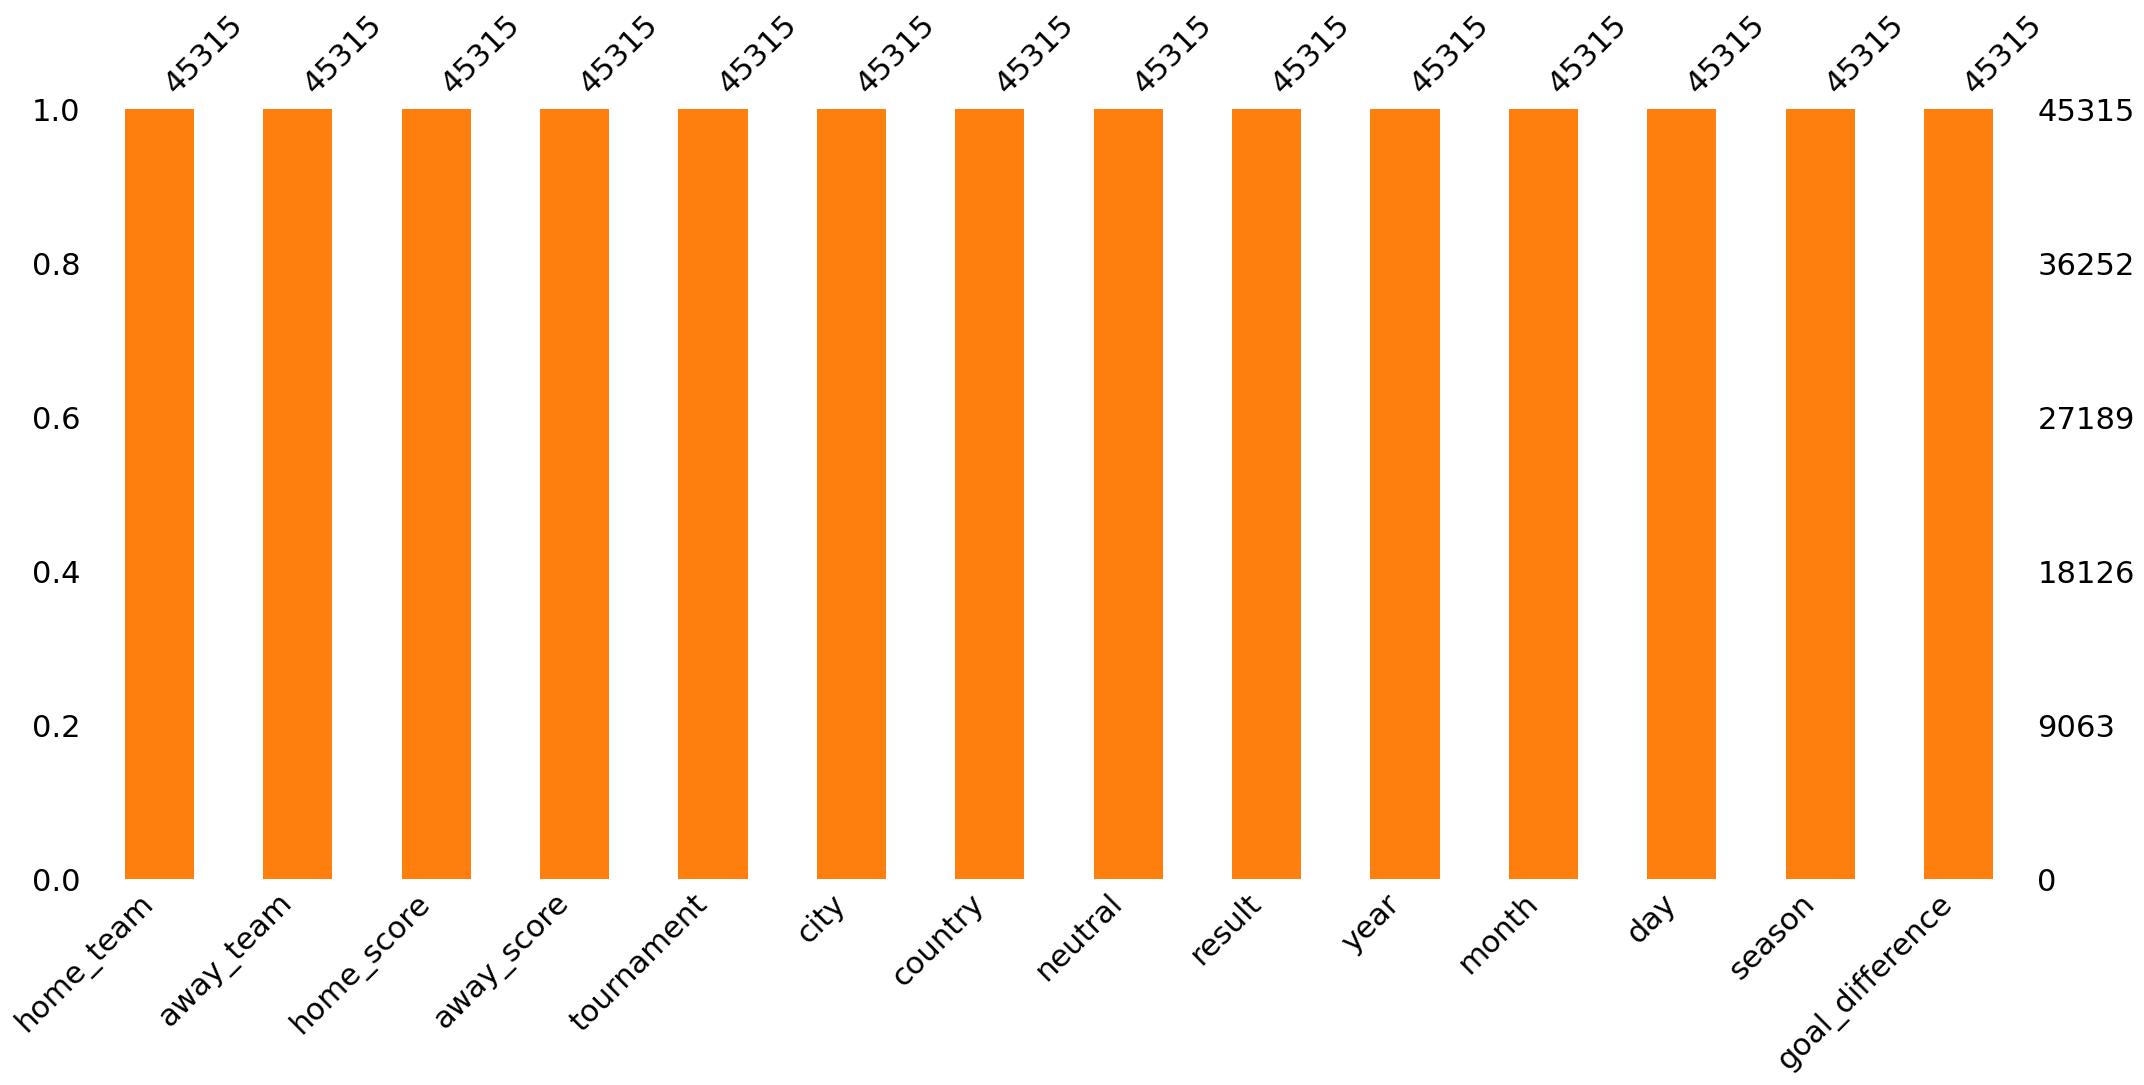

In [42]:
msno.bar(data, color='C1', fontsize=22)
plt.show()

In [43]:
# Another way to visualize missing Values

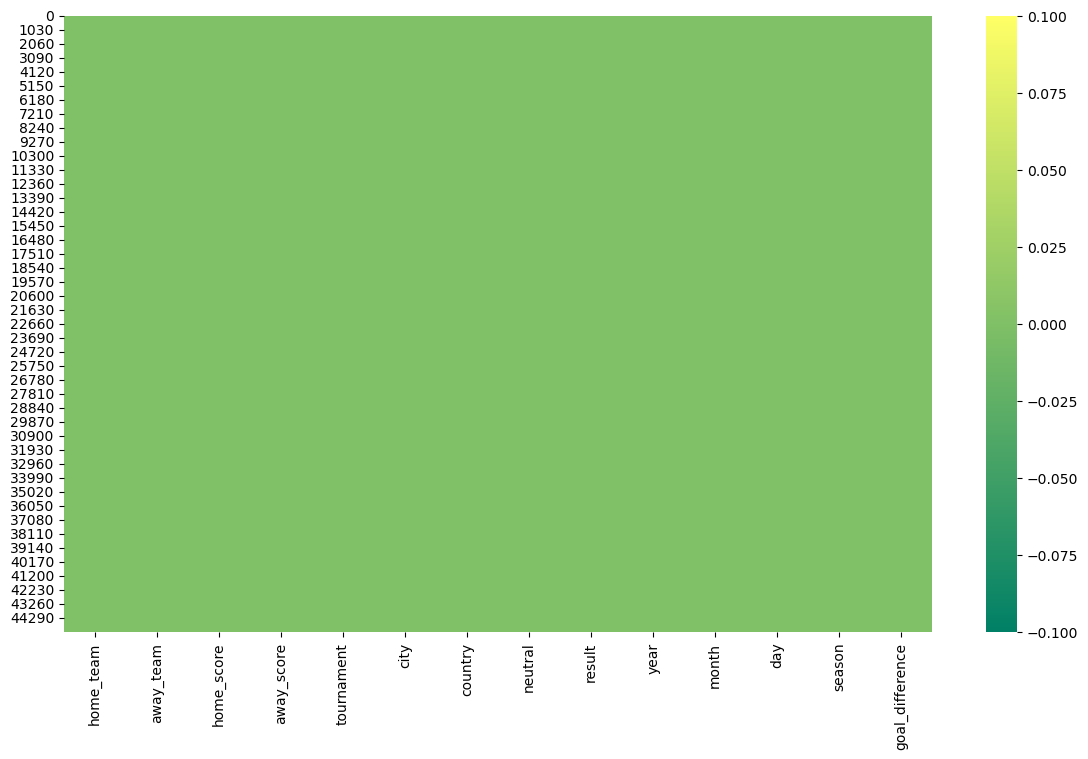

In [44]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.isnull(), cmap='summer')
plt.show()

In [45]:
data.dtypes

home_team          object
away_team          object
home_score          int64
away_score          int64
tournament         object
city               object
country            object
neutral              bool
result             object
year                int32
month               int32
day                 int32
season             object
goal_difference     int64
dtype: object

### Feature Encoding

In [46]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
num_cols = [col for col in data.columns if data[col].dtype!="object"] 

In [47]:
cat_cols

['home_team', 'away_team', 'tournament', 'city', 'country', 'result', 'season']

In [48]:
num_cols

['home_score',
 'away_score',
 'neutral',
 'year',
 'month',
 'day',
 'goal_difference']

In [49]:
# For Nominal data(have No order)  ==> One hot encoding
# For Ordinal data(have order) ==> Label enconding

In [50]:
data.dtypes

home_team          object
away_team          object
home_score          int64
away_score          int64
tournament         object
city               object
country            object
neutral              bool
result             object
year                int32
month               int32
day                 int32
season             object
goal_difference     int64
dtype: object

In [51]:
data['home_team'].nunique()  # Target guided encoding 

313

In [52]:
data['away_team'].nunique()  # Target Guided encoding

308

In [53]:
data['tournament'].nunique()  # Target guided encoding

147

In [54]:
data['city'].nunique()  # Target guided encoding

2048

In [55]:
data['country'].nunique()  # Target guided encoding

268

In [56]:
data['neutral'].nunique()  # Label encoding

2

In [57]:
data['result'].nunique() # Label encoding

3

In [58]:
data['season'].nunique()  # Label encoding

4

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
for col in ['neutral', 'result', 'season']:  # Label Encoding
    data[col] = le.fit_transform(data[col])

In [61]:
def target_guided_encoding(i_col, t_col): # Target guided encoding
    i_col_index = data.groupby([i_col])[t_col].mean().sort_values().index
    i_col_dict = {key:index for index , key in enumerate(i_col_index , 0)}
    data[i_col] = data[i_col].map(i_col_dict) 

In [62]:
target_guided_encoding('home_team', 'result')

In [63]:
target_guided_encoding('away_team', 'result')

In [64]:
target_guided_encoding('tournament', 'result')

In [65]:
target_guided_encoding('city', 'result')

In [66]:
target_guided_encoding('country', 'result')

In [67]:
data.dtypes

home_team          int64
away_team          int64
home_score         int64
away_score         int64
tournament         int64
city               int64
country            int64
neutral            int64
result             int32
year               int32
month              int32
day                int32
season             int32
goal_difference    int64
dtype: object

### Lets Perform outlier detection !

In [68]:
def plot(df, col):
    # Create a larger figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

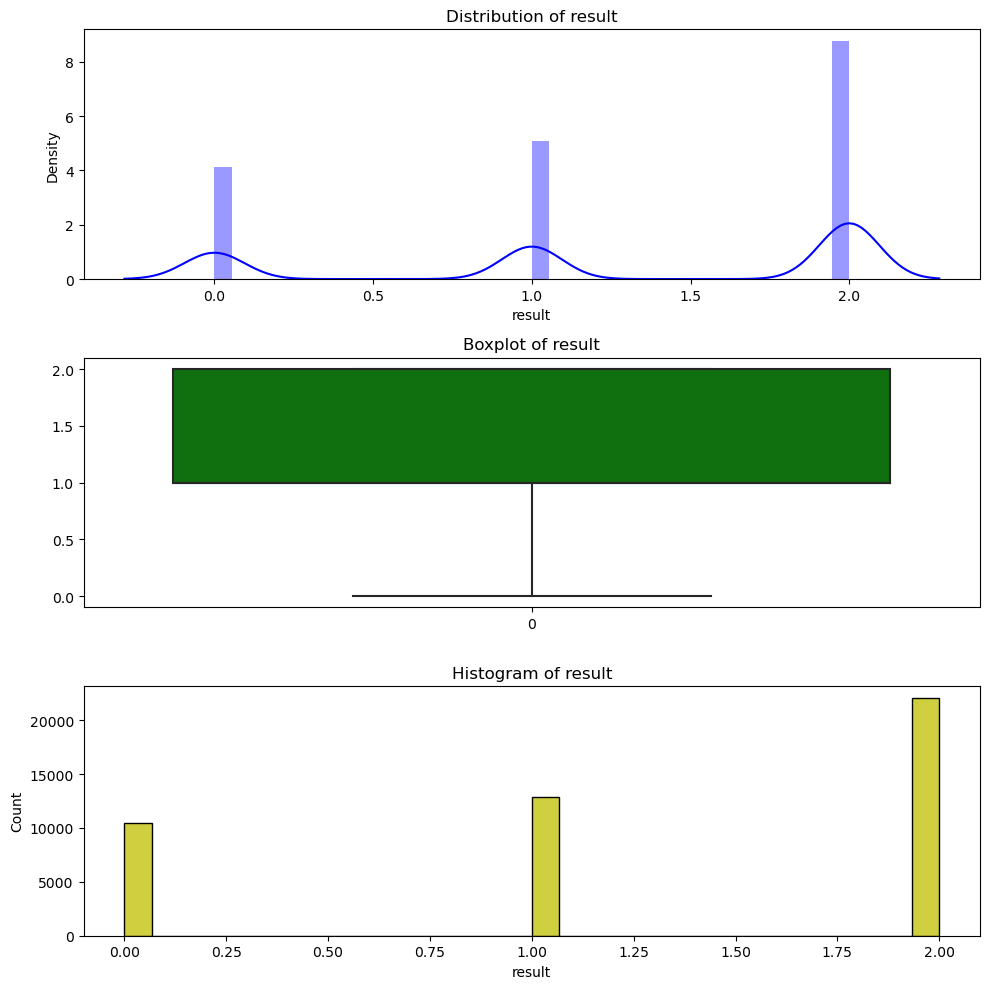

In [69]:
plot(data, 'result')

In [70]:
 q1 = data['result'].quantile(0.25)
q3 = data['result'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [71]:
maximum

3.5

In [72]:
minimum

-0.5

In [73]:
[x for x in data['result'] if x> maximum or x<minimum] 

[]

In [74]:
len([x for x in data['result'] if x> maximum or x<minimum] )

0

In [75]:
# So, no outlier

### Lets Perform feature selection

In [76]:
X = data.drop(['result'] , axis=1)

In [77]:
y = data['result']

In [78]:
from sklearn.feature_selection import mutual_info_regression

In [79]:
imp = mutual_info_regression(X, y)

In [80]:
imp

array([0.0299894 , 0.04101554, 0.24147144, 0.21747537, 0.        ,
       0.03846576, 0.01757043, 0.00961088, 0.00237909, 0.        ,
       0.00470638, 0.00059798, 0.2036209 ])

In [81]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [82]:
imp_df

,0
home_team,0.029989
away_team,0.041016
home_score,0.241471
away_score,0.217475
tournament,0.000000
city,0.038466
country,0.017570
neutral,0.009611
year,0.002379
month,0.000000


In [83]:
imp_df.columns = ['importance']

In [84]:
imp_df

,importance
home_team,0.029989
away_team,0.041016
home_score,0.241471
away_score,0.217475
tournament,0.000000
city,0.038466
country,0.017570
neutral,0.009611
year,0.002379
month,0.000000


In [85]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
home_score,0.241471
away_score,0.217475
goal_difference,0.203621
away_team,0.041016
city,0.038466
home_team,0.029989
country,0.017570
neutral,0.009611
day,0.004706
year,0.002379


In [86]:
data.drop(['month', 'day'], axis=1, inplace=True)

In [87]:
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,year,season,goal_difference
0,237,9,0,0,58,1158,215,0,0,1872,0,0
1,264,69,4,2,58,1176,213,0,2,1873,1,2
2,237,9,2,1,58,1158,215,0,2,1874,1,1
3,264,69,2,2,58,1176,213,0,0,1875,1,0
4,237,9,3,0,58,1158,215,0,2,1876,1,3


### Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
X_scaled

array([[ 0.84851807, -1.47710302, -0.99566607, ...,  1.70850631,
        -1.16887358, -0.23563211],
       [ 1.21897415, -0.62949451,  1.29412461, ..., -0.84278306,
        -0.24779567,  0.60430253],
       [ 0.84851807, -1.47710302,  0.14922927, ..., -0.95875076,
        -0.24779567,  0.18433521],
       ...,
       [-2.11513053,  0.30287485, -0.99566607, ...,  0.66479702,
        -1.16887358, -1.07556676],
       [-0.18052658,  0.43001612, -0.99566607, ...,  0.66479702,
        -1.16887358, -0.65559944],
       [ 0.83479748,  0.37350889, -0.4232184 , ...,  0.66479702,
        -1.16887358,  0.18433521]])

### Lets Build ML model

### split dataset into train & test

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# Splitting Data For Model Which Don't Need Scaled Data.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
X_train.shape

(33986, 13)

In [94]:
X_test.shape

(11329, 13)

In [95]:
y_train.shape

(33986,)

In [96]:
y_test.shape

(11329,)

In [97]:
# Splitting Data For Model Which Need Scaled Data.

In [98]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [99]:
X_train1.shape

(33986, 13)

In [100]:
X_test1.shape

(11329, 13)

In [101]:
y_train1.shape

(33986,)

In [102]:
y_test1.shape

(11329,)

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
ml_model = RandomForestRegressor()

In [105]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [106]:
y_pred = ml_model.predict(X_test)

In [107]:
y_pred

array([0., 1., 2., ..., 0., 0., 2.])

In [108]:
from sklearn import metrics

In [109]:
metrics.r2_score(y_test , y_pred)

1.0

### How to automate ml pipeline & How to define your Evaluation metric..

### how to make our own metric...

In [110]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   

In [111]:
mape(y_test, y_pred)

nan

### How to automate ml pipeline !

### Model Building For Scaled Data

In [112]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [113]:
evaluation_results = [] 

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Printing training score
    training_score = model.score(X_train, y_train)
    print('Training score : {}'.format(training_score))
    
    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print('Testing score : {}'.format(testing_score))
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })
    
    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    # Printing predictions
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    # Calculating and printing evaluation metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('R2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE : {}'.format(mape(y_test, y_prediction)))
    
    # Plotting the distribution of residuals with a colorful style
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.4, 0.4)
    plt.ylim(0, 50)
    plt.show()

    # Model prediction details with colorful text
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy Score on Testing Data is: {accuracy_score(y_test, y_prediction) * 100:.2f}%")
    print(f"Precision Score is: {precision_score(y_test, y_prediction, average='weighted')}")
    print(f"Recall Score is: {recall_score(y_test, y_prediction, average='weighted')}")
    print(f"F1 Score is: {f1_score(y_test, y_prediction, average='weighted')}")
    
    # Confusion Matrix with a colorful heatmap
    print("\n------------------------------------------------------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()

In [115]:
# 1. Logistic-Regression Model

In [116]:
from sklearn.linear_model import LogisticRegression

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


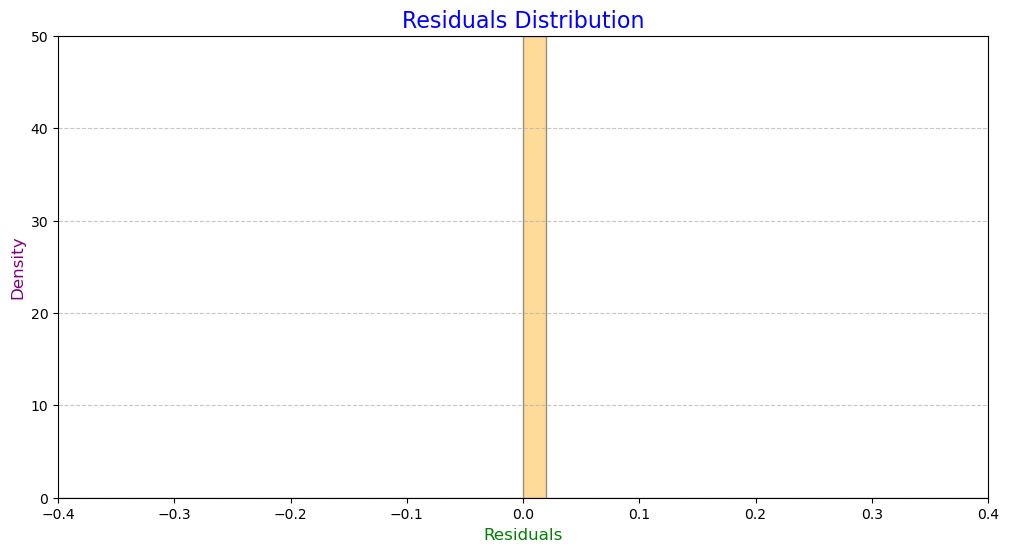


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


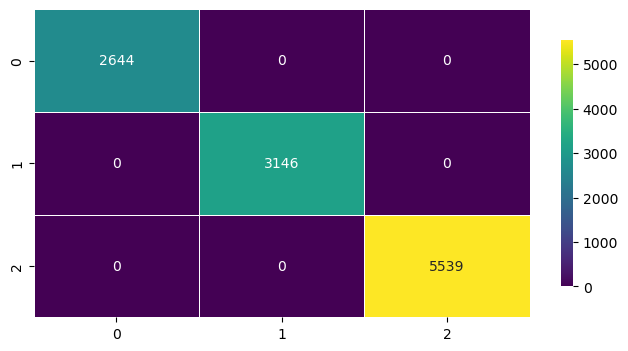

In [117]:
evaluate_model(LogisticRegression(),'Logistic Regression', X_train1, y_train1, X_test1, y_test1)

In [118]:
# 2. KNeighborsClassifier Model

In [119]:
from sklearn.neighbors import KNeighborsClassifier

Training score : 0.9520390749131995
Testing score : 0.9071409656633419
Predictions are : [0 1 2 ... 0 0 0]


R2 score : 0.6514946803753163
MAE : 0.13822932297643217
MSE : 0.22896990025598024
RMSE : 0.47850799393111526
MAPE : nan


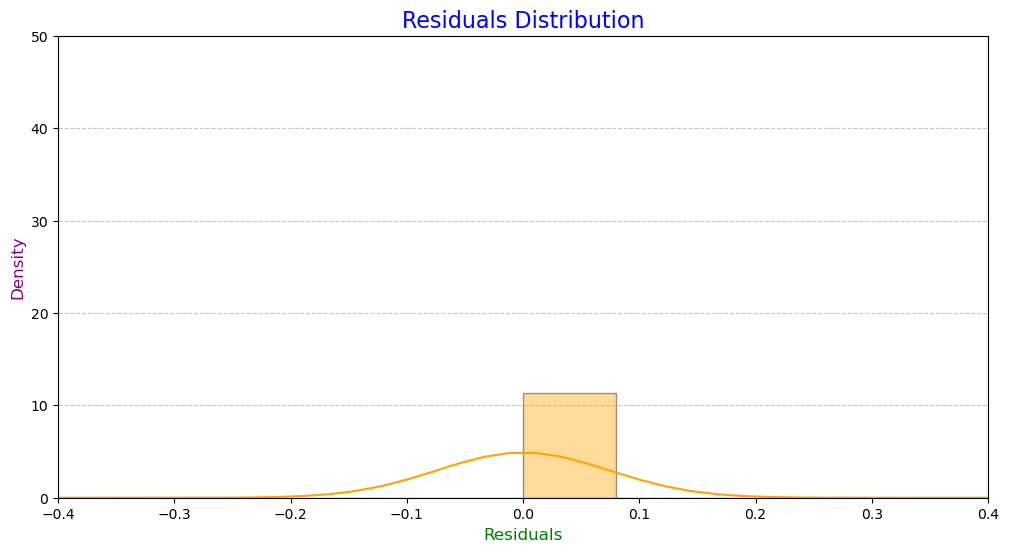


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 90.71%
Precision Score is: 0.9111124064608368
Recall Score is: 0.9071409656633419
F1 Score is: 0.9085082606523397

------------------------------------------------------------------------
Confusion Matrix:


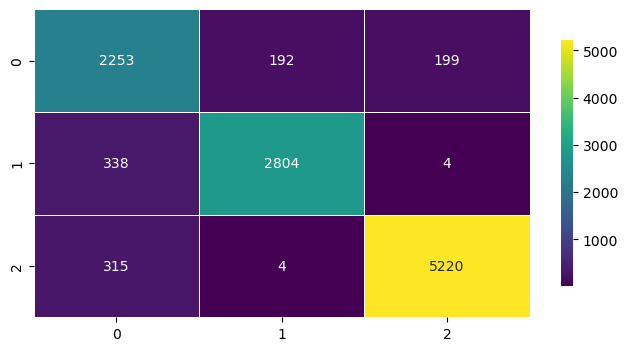

In [120]:
evaluate_model(KNeighborsClassifier(), 'KNN', X_train1, y_train1, X_test1, y_test1)

In [121]:
# 3. Support-Vector-Classifier Model

In [122]:
from sklearn.svm import SVC

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


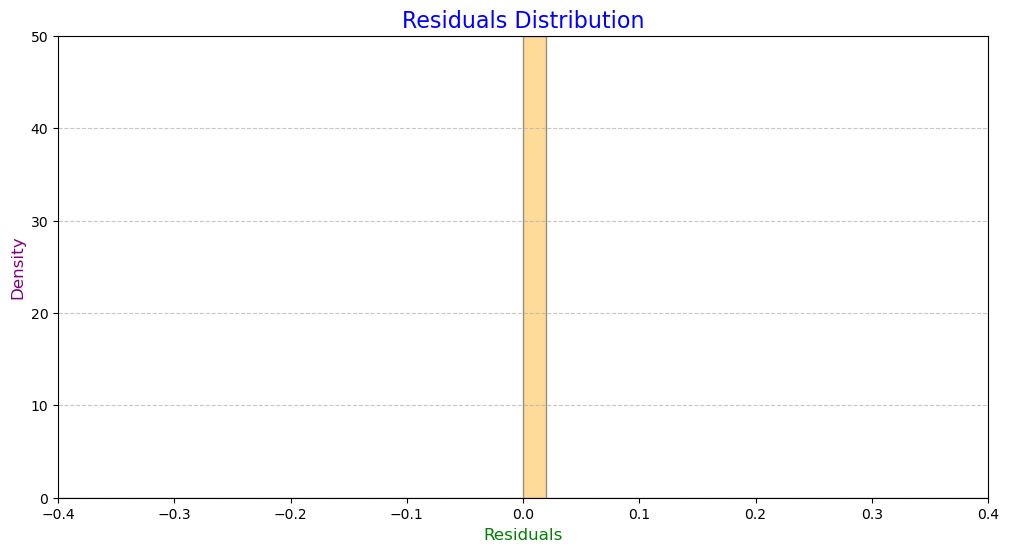


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


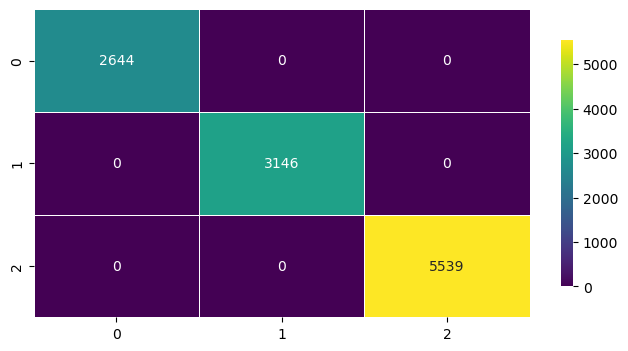

In [123]:
evaluate_model(SVC(), 'SVM', X_train1, y_train1, X_test1, y_test1)

In [124]:
# 4. Naive-Bayes Model

In [125]:
from sklearn.naive_bayes import GaussianNB

Training score : 0.993526746307303
Testing score : 0.9929384764762997
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 0.9892519562182056
MAE : 0.007061523523700239
MSE : 0.007061523523700239
RMSE : 0.08403287168543176
MAPE : nan


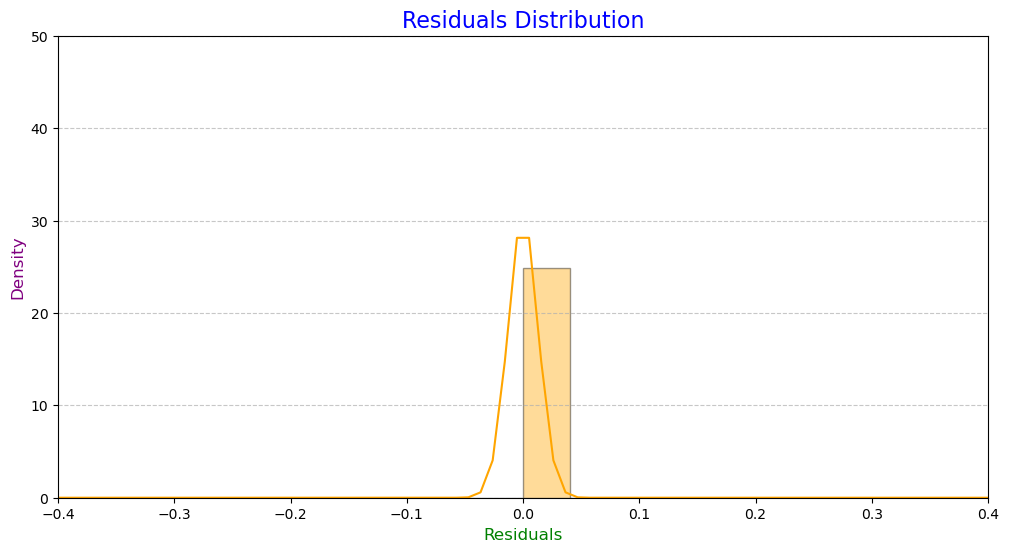


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 99.29%
Precision Score is: 0.9929473894202178
Recall Score is: 0.9929384764762997
F1 Score is: 0.9929413687020024

------------------------------------------------------------------------
Confusion Matrix:


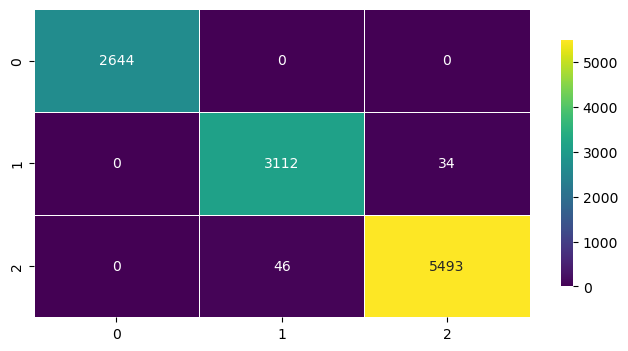

In [126]:
evaluate_model(GaussianNB(), 'Naive Bayes', X_train1, y_train1, X_test1, y_test1)

### Model Building For Un-Scaled Data

In [127]:
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Printing training score
    training_score = model.score(X_train, y_train)
    print('Training score : {}'.format(training_score))
    
    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print('Testing score : {}'.format(testing_score))
    
    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })
    
    # Making predictions on the test set
    y_prediction = model.predict(X_test)
    
    # Printing predictions
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    # Calculating and printing evaluation metrics
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('R2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test, y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test, y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_prediction))))
    print('MAPE : {}'.format(mape(y_test, y_prediction)))
    
    # Plotting the distribution of residuals with a colorful style
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.4, 0.4)
    plt.ylim(0, 50)
    plt.show()

    # Model prediction details with colorful text
    print("\n------------------------------------------------------------------------")
    print(f"Accuracy Score on Testing Data is: {accuracy_score(y_test, y_prediction) * 100:.2f}%")
    print(f"Precision Score is: {precision_score(y_test, y_prediction, average='weighted')}")
    print(f"Recall Score is: {recall_score(y_test, y_prediction, average='weighted')}")
    print(f"F1 Score is: {f1_score(y_test, y_prediction, average='weighted')}")
    
    # Confusion Matrix with a colorful heatmap
    print("\n------------------------------------------------------------------------")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot=True, fmt="g", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.8})
    plt.show()

In [128]:
# 5. Decision-Tree-Classifier Model

In [129]:
from sklearn.tree import DecisionTreeClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


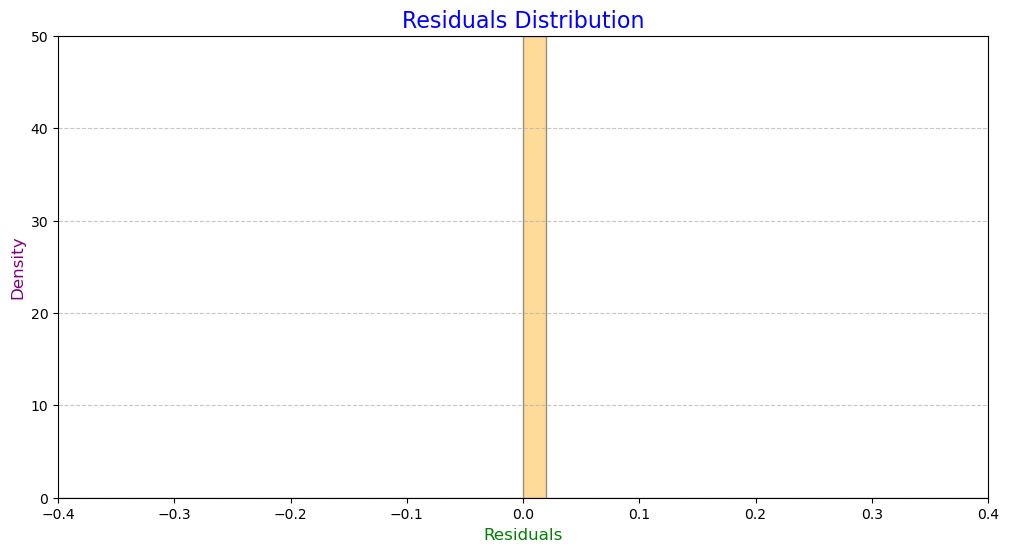


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


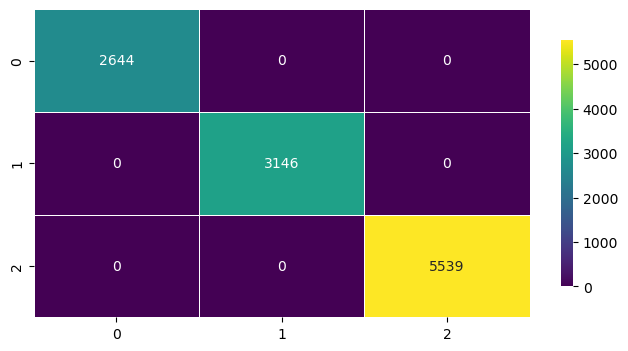

In [130]:
evaluate_model(DecisionTreeClassifier(), 'Descision Tree', X_train, y_train, X_test, y_test)

In [131]:
# 6. Random-Forest-Classifier Model

In [132]:
from sklearn.ensemble import RandomForestClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


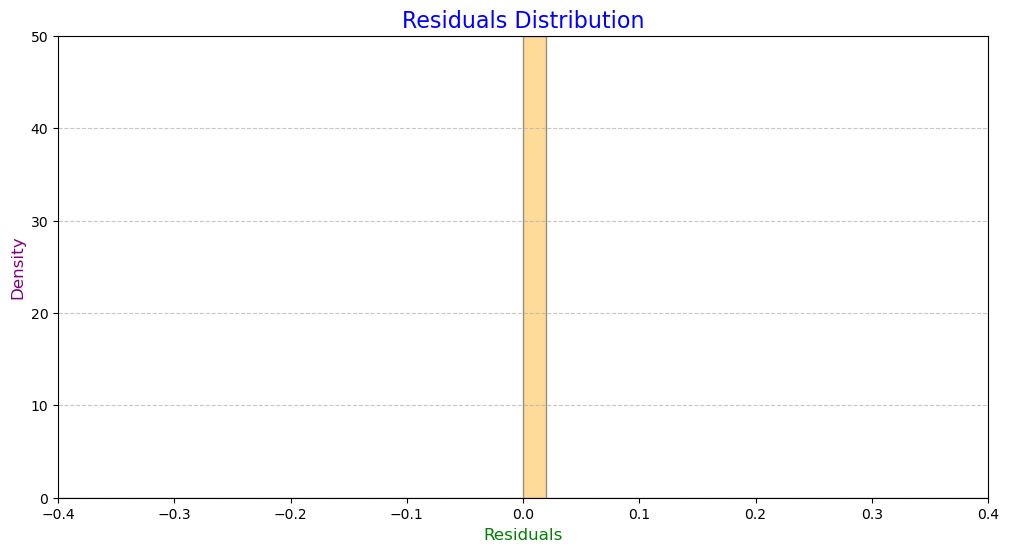


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


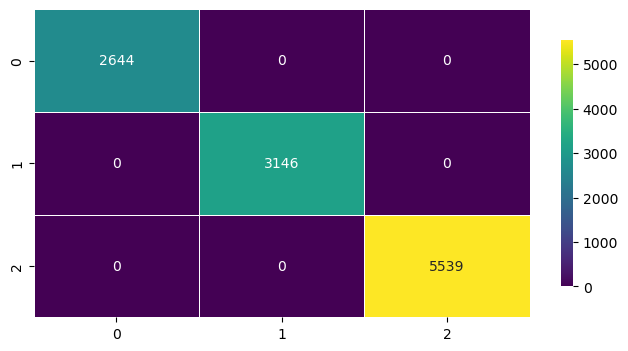

In [133]:
evaluate_model(RandomForestClassifier(), 'Random Forest', X_train, y_train, X_test, y_test)

In [134]:
# 7. Ada-Boost-Classifier Model

In [135]:
from sklearn.ensemble import AdaBoostClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


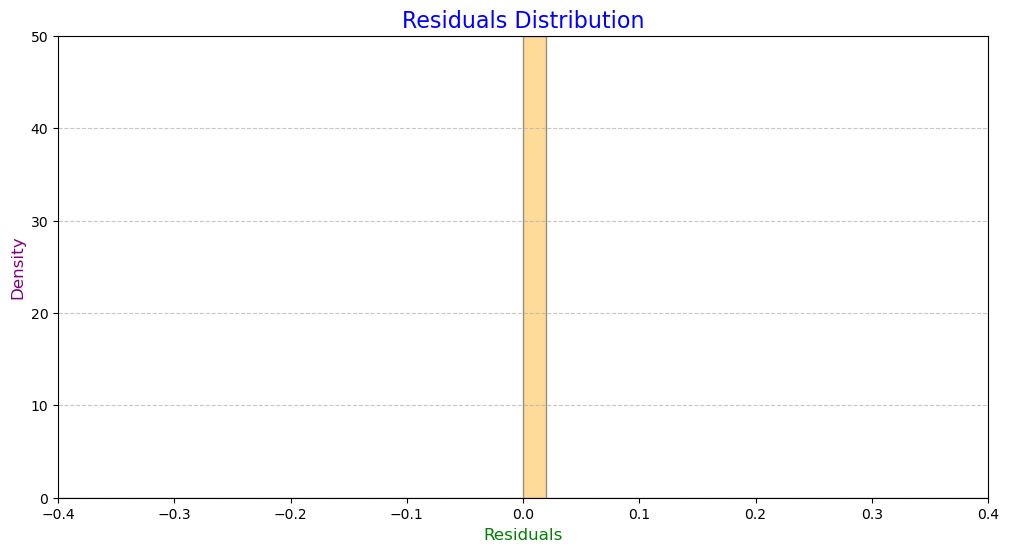


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


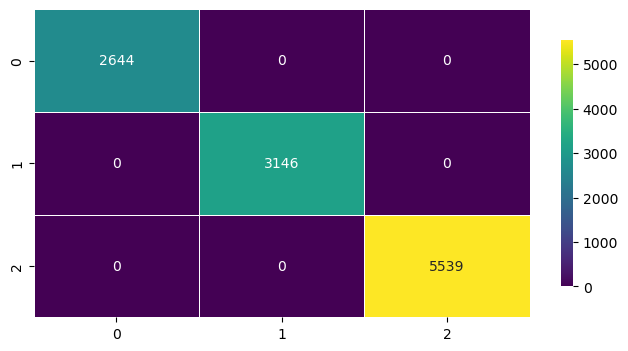

In [136]:
evaluate_model(AdaBoostClassifier(), 'Ada Boost', X_train, y_train, X_test, y_test)

In [137]:
# 8. Gradient-Boosting-Classifier Model

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


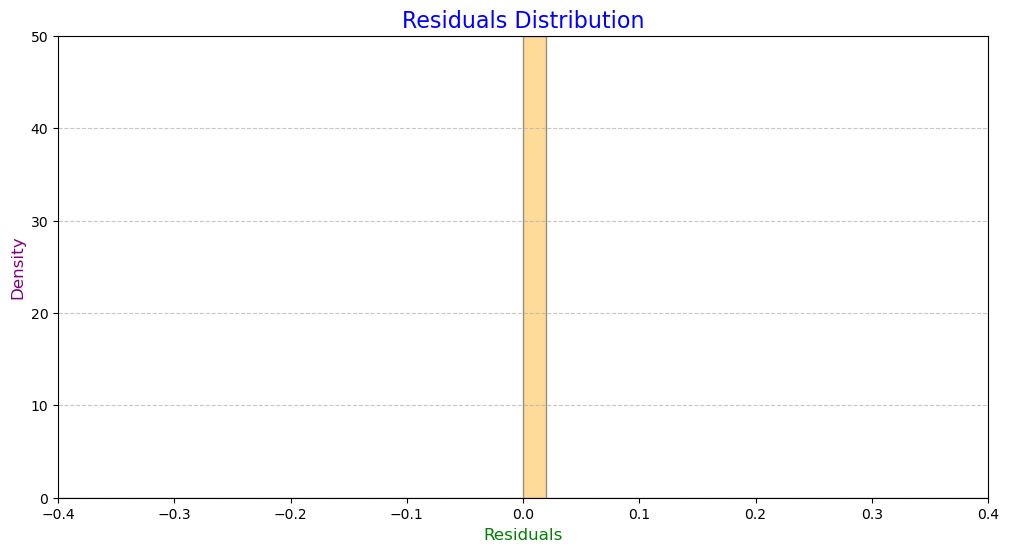


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


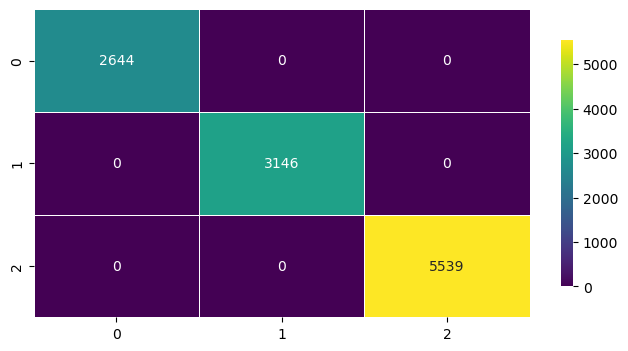

In [139]:
evaluate_model(GradientBoostingClassifier(), 'Gradient Boost', X_train, y_train, X_test, y_test)

In [140]:
# 9. LGMB Classifier Model

In [141]:
from lightgbm import LGBMClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


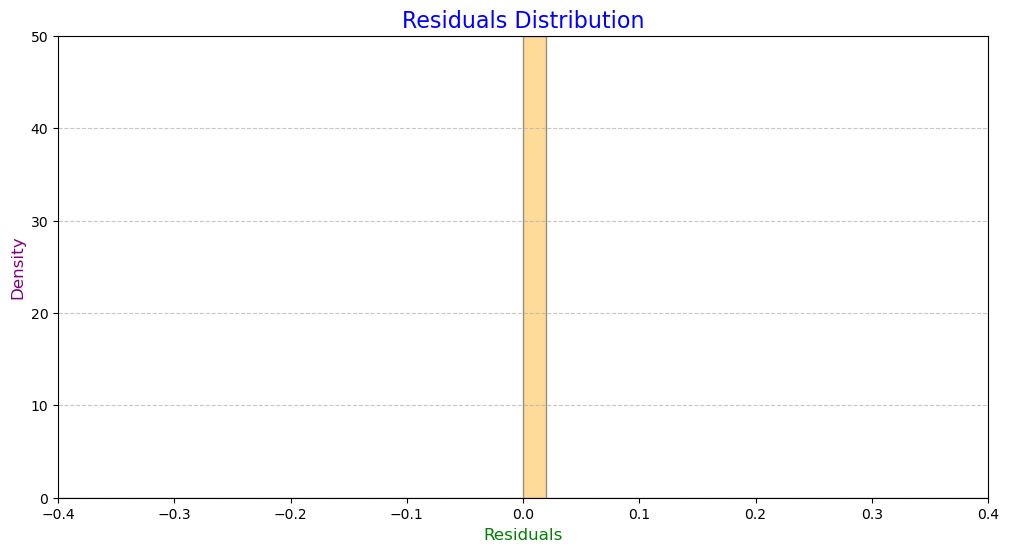


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


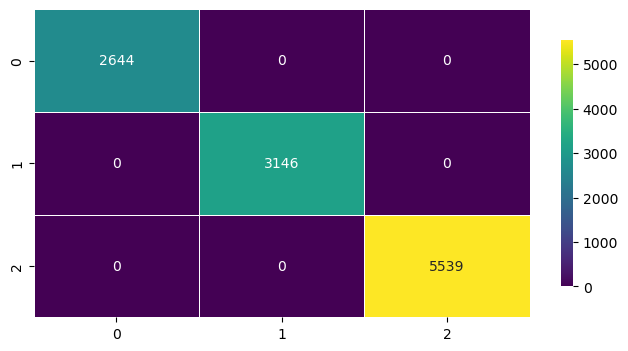

In [142]:
evaluate_model(LGBMClassifier(),'LGBM', X_train, y_train, X_test, y_test)

In [143]:
# 10. XGBClassifier Model

In [144]:
from xgboost import XGBClassifier

Training score : 1.0
Testing score : 1.0
Predictions are : [0 1 2 ... 0 0 2]


R2 score : 1.0
MAE : 0.0
MSE : 0.0
RMSE : 0.0
MAPE : nan


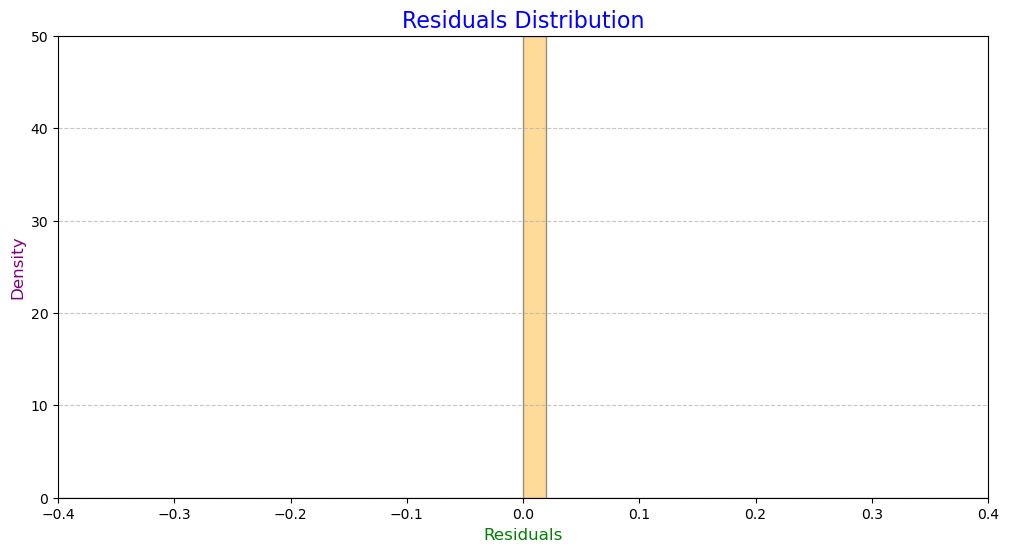


------------------------------------------------------------------------
Accuracy Score on Testing Data is: 100.00%
Precision Score is: 1.0
Recall Score is: 1.0
F1 Score is: 1.0

------------------------------------------------------------------------
Confusion Matrix:


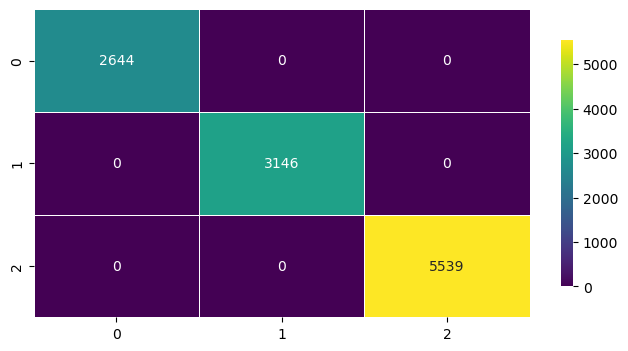

In [145]:
evaluate_model(XGBClassifier(),'XG Boost', X_train, y_train, X_test, y_test)

### All Model Performance Comparison

In [146]:
df_results = pd.DataFrame(evaluation_results)

In [147]:
df_results

,Model,Training Score,Testing Score
0,Logistic Regression,1.000000,1.000000
1,KNN,0.952039,0.907141
2,SVM,1.000000,1.000000
3,Naive Bayes,0.993527,0.992938
4,Descision Tree,1.000000,1.000000
5,Random Forest,1.000000,1.000000
6,Ada Boost,1.000000,1.000000
7,Gradient Boost,1.000000,1.000000
8,LGBM,1.000000,1.000000
9,XG Boost,1.000000,1.000000


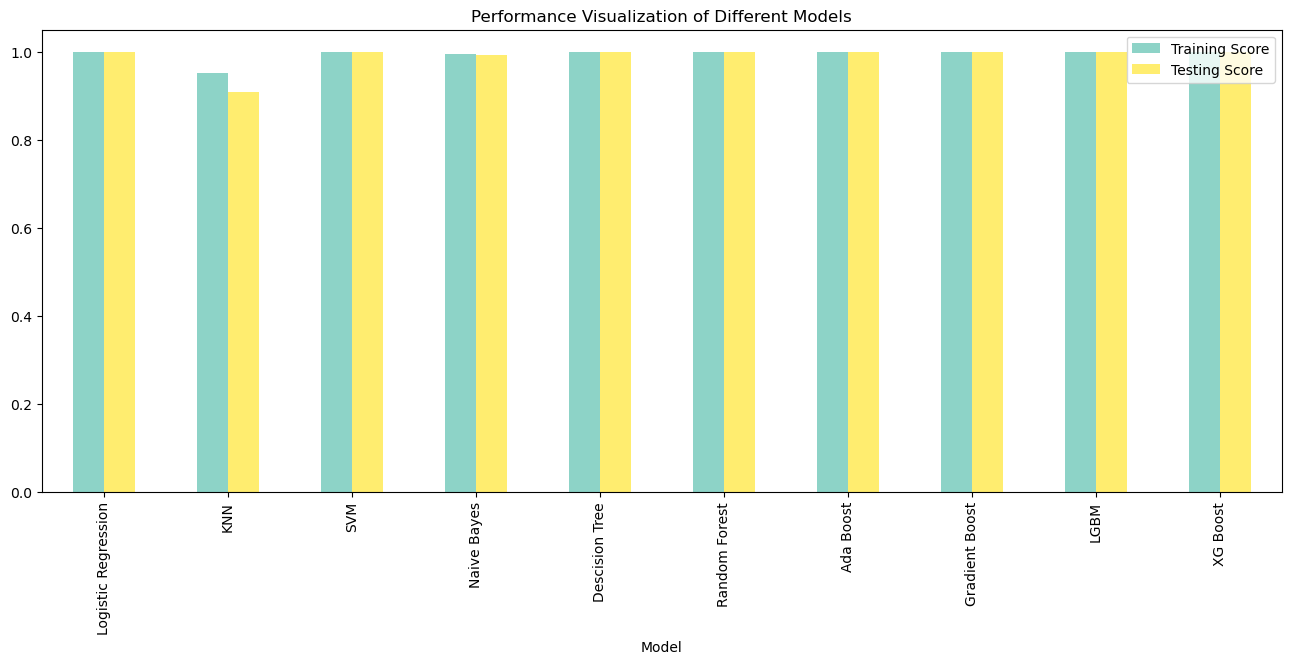

In [148]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

### Hyper-Parameter Tunning of LGBM Model

In [149]:
model1 = LGBMClassifier()

In [150]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}     

In [151]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# When search space is small & computational resources are enough ==> Grid Search
# When search space is large & computational resources are limited ==> Random Search

In [152]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [153]:
grid_search1.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [154]:
grid_search1.best_score_

1.0

In [155]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01,
 'n_estimators': 100,
 'num_leaves': 16,
 'random_state': 0}

In [156]:
# Creating LGBM Model Using Best Parameters.

In [157]:
model1 = LGBMClassifier(**best_parameters1)

In [158]:
model1.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.01, num_leaves=16, random_state=0)

In [159]:
X_test_pred1 = model1.predict(X_test)

In [160]:
accuracy_score(y_test,X_test_pred1)

1.0

### Hyper-Parameter Tunning of XGBoost Model

In [161]:
model2 = XGBClassifier()

In [162]:
parameters2 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [163]:
grid_search2 = GridSearchCV(model2, parameters2 , cv=5, n_jobs=-1)

In [164]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [165]:
grid_search2.best_score_

1.0

In [166]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [167]:
# Creating XGBoost Model Using Best Parameters

In [168]:
model2 = XGBClassifier(**best_parameters2)

In [169]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [170]:
X_test_pred2 = model2.predict(X_test)

In [171]:
accuracy_score(y_test,X_test_pred2) 

1.0

### Hyper Parameter Tunning of RandomForest Model

In [172]:
model3 = RandomForestClassifier()

In [173]:
parameters3 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [174]:
grid_search3 = GridSearchCV(model3, parameters3, cv=5, n_jobs=-1)

In [175]:
grid_search3.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [176]:
grid_search3.best_score_

1.0

In [177]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [178]:
# Creating Random Forest Model Using Best Parameters

In [179]:
model3 = RandomForestClassifier(**best_parameters3)

In [180]:
model3.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=7)

In [181]:
X_test_pred3 = model3.predict(X_test)

In [182]:
accuracy_score(y_test,X_test_pred3)

1.0

### Stacking Classifier Model

In [183]:
from sklearn.ensemble import StackingClassifier

In [185]:
stacking_model = StackingClassifier(estimators=[('LGBM', model1), 
                                                ("XGBoost", model2),
                                                ('RF', model3)])

In [186]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.01,
                                               num_leaves=16, random_state=0)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob',
                                              predictor=None, ...)),
                               ('RF',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=4,
                                                       min_samples_split=7))])

In [187]:
X_train_pred4 = stacking_model.predict(X_train)

In [188]:
X_test_pred4 = stacking_model.predict(X_test)

In [189]:
print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,X_train_pred4)*100)

Stacking Model accuracy on Training Data is: 100.0


In [190]:
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,X_test_pred4)*100)

Stacking Model accuracy on Testing Data is: 100.0


### Please Upvote, Comment and Support !!

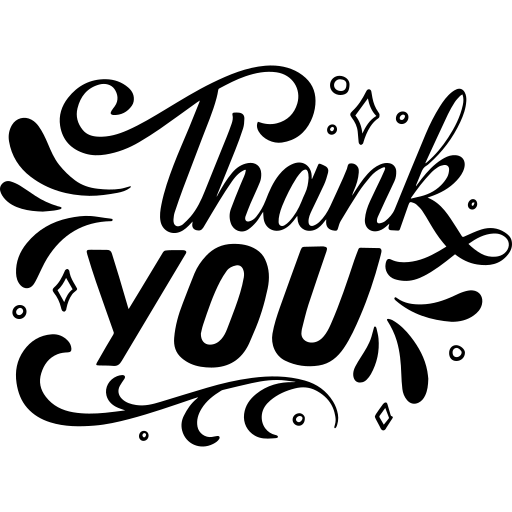